# Search: Solving a Maze Using a Goal-based Agent

Student Name: Ephraim Sun

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: E.S.

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.


## Introduction

The agent has a map of the maze it is in and the environment is assumed to be **deterministic, discrete, and known.** The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  This is a planing exercise for a goal-based agent, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent in a deterministic environment (i.e., the transition function is deterministic with the outcome of each state/action pair fixed and no randomness) can just follow the path and does not need to care about the percepts.
This is also called an **[open-loop system](https://en.wikipedia.org/wiki/Open-loop_controller).**
The execution phase is trivial and we do not implement it in this exercise.

Tree search algorithm implementations that you find online and used in general algorithms courses have often a different aim. These algorithms assume that you already have a tree in memory. We are interested in dynamically creating a search tree with the aim of finding a good/the best path from the root note to the goal state. Follow the pseudo code presented in the text book (and replicated in the slides) closely. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible.

Several mazes for this exercise are stored as text files. Here is the small example maze:

In [1]:
with open("empty_maze.txt", "r") as f:
    maze_str = f.read()
print(maze_str)

XXXXXXXXXXXX
X          X
X        G X
X          X
X          X
X          X
X          X
X          X
X          X
X S        X
X          X
XXXXXXXXXXXX



__Note:__ The mazes above contains cycles and therefore the state space may not form proper trees unless cycles are prevented. Therfore, you will need to deal with cycle detection in your code.

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the module [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation. Position are represented as a 2-tuple of the form `(row, col)`.

In [2]:
import maze_helper as mh

maze = mh.parse_maze(maze_str)

# look at a position in the maze by subsetting the 2d array
print("Position(0,0):", maze[1, 0])

# there is also a helper function called `look(maze, pos)` available
# which uses a 2-tuple for the position.
print("Position(8,1):", mh.look(maze, (8, 1)))

Position(0,0): X
Position(8,1):  


A helper function to visualize the maze is also available.

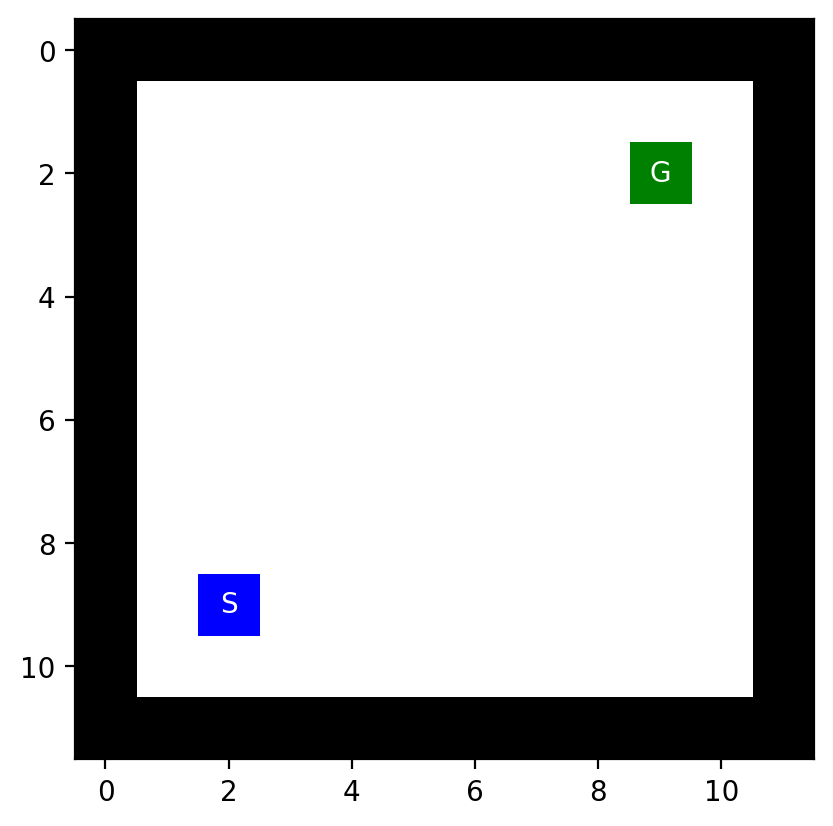

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebook

mh.show_maze(maze)

Find the position of the start and the goal using the helper function `find_pos()`

In [4]:
print("Start location:", mh.find_pos(maze, what = "S"))
print("Goal location:", mh.find_pos(maze, what = "G"))

Start location: (9, 2)
Goal location: (2, 9)


Helper function documentation.

In [5]:
help(mh)

Help on module maze_helper:

NAME
    maze_helper

DESCRIPTION
    Code for the Maze Assignment by Michael Hahsler
    Usage: 
        import maze_helper as mh
        mh.show_some_mazes()

FUNCTIONS
    find_pos(maze, what='S')
        Find start/goal in a maze and returns the first one. 
        Caution: there is no error checking!
        
        Parameters:
        maze: a array with characters prodced by parse_maze()
        what: the letter to be found ('S' for start and 'G' for goal)
        
        Returns:
        a tupple (x, y) for the found position.
    
    look(maze, pos)
        Look at the label of a square with the position as an array of the form (x, y).
    
    parse_maze(maze_str)
        Convert a maze as a string into a 2d numpy array
    
    show_maze(maze, fontsize=10)
        Display a (parsed) maze as an image.
    
    welcome()
        Welcome message.

FILE
    /Users/ephraim888sun/Code/class/spring2024/AI/Lab2/maze_helper.py




## Tree structure

Here is an implementation of the basic node structure for the search algorithms (see Fig 3.7 on page 73). I have added a method that extracts the path from the root node to the current node. It can be used to get the path when the search is completed.

In [6]:
class Node:
    def __init__(self, pos, parent, action, cost):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"

    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]

        while not node.parent is None:
            node = node.parent
            path.append(node)

        path.reverse()

        return(path)

If needed, then you can add more fields to the class like the heuristic value $h(n)$ or $f(n)$.

Examples for how to create and use a tree and information on memory management can be found [here](../HOWTOs/trees.ipynb).

# Tasks

The goal is to:

1. Implement the following search algorithms for solving different mazes:

    - Breadth-first search (BFS)
    - Depth-first search (DFS)
    - Greedy best-first search (GBFS)
    - A* search

2. Run each of the above algorithms on the
    - [small maze](small_maze.txt),
    - [medium maze](medium_maze.txt),
    - [large maze](large_maze.txt),
    - [open maze](open_maze.txt),
    - [wall maze](wall_maze.txt),
    - [loops maze](loops_maze.txt),
    - [empty maze](empty_maze.txt), and
    - [empty 2_maze](empty_2_maze.txt).
    
3. For each problem instance and each search algorithm, report the following in a table:

    - The solution and its path cost
    - Total number of nodes expanded
    - Maximum tree depth
    - Maximum size of the frontier

4. Display each solution by marking every maze square (or state) visited and the squares on the final path.

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Defining the search problem and determining the problem size [10 Points]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

Use verbal descriptions, variables and equations as appropriate.

*Note:* You can swich the next block from code to Markdown and use formating.

Initial State: The initial state is the start position of the maze. The start position is the position of the character 'S' in the maze.

Actions: availables moves (North, West, South, East)

Transition Model: List of all possible actions for each state.

Goal State: End state of where we are trying to reach at the maze

Path cost: The number of actions (usually determined by a weight) to reach the goal state.



Give some estimates for the problem size:

* $n$: state space size
* $d$: depth of the optimal solution
* $m$: maximum depth of tree
* $b$: maximum branching factor

Describe how you would determinw these values for a given maze.

State Space Size: the number of valid states in the problem. In this case, with an nxn grid and a certain number of invalid states, the state space size is equal to the number of open squares because those are the only possible states.

Depth of the Optimal Solution: distance between the start state and the goal state. This can be determined using various search algorithms, such as Breadth-First Search (BFS), which guarantees finding the optimal solution.

Maximum depth of the tree: the longest path from the initial state to any other state in the tree. To calculate this, one can perform a Depth-First Search (DFS) until the search algorithm completes, keeping track of the longest depth encountered. If there are loops in the graph, the maximum depth, m, is considered infinite.

Maximum branching factor: the number of possible new frontier states that can be reached from a single node. In this case, since there are only four possible actions (up, down, left, and right), the maximum branching factor is 4.

## Task 2: Uninformed search: Breadth-first and depth-first [40 Points]

Implement these search strategies. Follow the pseudocode in the textbook/slides. You can use the tree structure shown above to extract the final path from your solution.

__Notes:__
* You can find maze solving implementations online that use the map to store information. While this is an effective idea for this two-dimensional navigation problem, it typically cannot be used for other search problems. Therefore, follow the textbook and only store information in the tree created during search, and use the `reached` and `frontier` data structures.
* DSF can be implemented using the BFS tree search algorithm and simply changing the order in which the frontier is expanded (this is equivalent to best-first search with path length as the criterion to expand the next node). However, to take advantage of the significantly smaller memory footprint of DFS, you need to implement DFS in a different way without a `reached` data structure and by releasing the memory for nodes that are not needed anymore.
* If DFS does not use a `reached` data structure, then its cycle checking abilities are limited. Remember, that DSF is incomplete if cycles cannot be prevented. You will see in your experiments that open spaces are a problem.

In [7]:
# Helper Functions - Taken From Class Lecture Notebooks

import numpy as np
from matplotlib import colors
from matplotlib import animation, rc
import matplotlib.pyplot as plt
from IPython.display import HTML
rc('animation', html='html5')

# numpy comparison warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def maze_to_matrix(maze):  
    """convert a maze a numeric numpy array for visualization via imshow."""

    # make a deep copy first so the original maze is not changed
    maze = np.copy(maze)
    
    # Converts all tile types to integers
    maze[maze == ' '] = 0
    maze[maze == 'X'] = 1 # wall
    maze[maze == 'S'] = 2 # start
    maze[maze == 'G'] = 3 # goal
    maze[maze == 'P'] = 4 # position/final path
    maze[maze == '.'] = 5 # explored squares
    maze[maze == 'F'] = 6 # frontier
    maze = maze.astype(int)
    
    return(maze)

# Based on show_maze but modified to generate animation (suggested by Troy Jeffrey McNitt)
# Sadly I can not embed the animations in the PDF I have to submit :(
def animate_maze(result, repeat = False):
        """Build an animation from a list of mazes. Assumes that results has the elements:
           path, reached, actions and maze_anim with a list of maze arrays."""
        
        if result['path'] != None:       
            print(f"Path length: {len(result['path'])-1}")
            print(f"Reached squares: {len(result['reached'])}")
            print(f"Action sequence: {result['actions']}")
        else:
            print("No solution found.")
        
        
        mazes = result['maze_anim']
        
        cmap = colors.ListedColormap(['white', 'black', 'blue', 'green', 'red', 'gray', 'orange'])
 
        goal = mh.find_pos(mazes[0], 'G')
        start = mh.find_pos(mazes[0], 'S')
 
        mazes = [maze_to_matrix(m) for m in mazes]

        fig, ax = plt.subplots()
        im = ax.imshow(maze_to_matrix(mazes[0]), cmap = cmap, norm = colors.BoundaryNorm(list(range(cmap.N + 1)), cmap.N))
 
        plt.text(start[1], start[0], "S", fontsize = 10, color = "white",
                horizontalalignment = 'center',
                verticalalignment = 'center')
 
        plt.text(goal[1], goal[0], "G", fontsize = 10, color = "white",
                horizontalalignment = 'center',
                verticalalignment = 'center')

        def step(i):  
                im.set_array(maze_to_matrix(mazes[i]))
                return([im])
 
        ani = animation.FuncAnimation(
            fig, 
            step, 
            frames = len(mazes),
            repeat = repeat
        )
 
        plt.close()

        return ani

def getActions(nMaze, nodePos, verbose=False):
    """Get the legal actions for a given node position."""
    actions = []
    for action in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
        newPos = move(nodePos, action)
        if isLegalPos(nMaze, newPos):
            actions.append(action)
    if verbose:
        print(f"Actions for {nodePos}: {actions}")
    return actions

def isLegalPos(maze, pos):
    """Check if a position is legal in the maze."""
    if pos[0] < 0 or pos[1] < 0:
        return False
    if pos[0] >= maze.shape[0] or pos[1] >= maze.shape[1]:
        return False
    if maze[pos] == 'X':
        return False
    return True

def move(pos, action):
    """Move from a position in a direction."""
    return (pos[0] + action[0], pos[1] + action[1])

In [8]:
# Metrics Class

class Metrics:
    def __init__(self, solution_path, nodes_expanded, max_tree_depth, max_frontier_size, path_cost, algorithm):
        self.solution_path = solution_path
        self.nodes_expanded = nodes_expanded
        self.max_tree_depth = max_tree_depth
        self.max_frontier_size = max_frontier_size
        self.path_cost = path_cost
        self.algorithm = algorithm

    def update_solution_path(self, path):
        self.solution_path = path

    def increment_nodes_expanded(self):
        self.nodes_expanded += 1

    def update_max_tree_depth(self, depth):
        if depth > self.max_tree_depth:
            self.max_tree_depth = depth

    def update_max_frontier_size(self, size):
        if size > self.max_frontier_size:
            self.max_frontier_size = size

    def update_path_cost(self, cost):
        self.path_cost = cost

    def set_algorithm(self, algorithm):
        self.algorithm = algorithm

    def print_metrics(self):

        print("--------")
        print("Metrics:")
        print(f"Algorithm: {self.algorithm}")
        print(f"Path Cost: {self.path_cost}")
        print(f"Nodes Expanded: {self.nodes_expanded}")
        print(f"Max Tree Depth: {self.max_tree_depth}")
        print(f"Max Nodes in Memory: {self.nodes_expanded + self.max_frontier_size}")
        print(f"Max Frontier Size: {self.max_frontier_size}")
        print("--------")

#### Breadth First Search

In [9]:
# Breadth First Search

def breadthFirstSearch(maze, verbose=False):
    startState = mh.find_pos(maze, what="S")
    goalState = mh.find_pos(maze, what="G")

    currentNode = Node(pos=startState, parent=None, action=None, cost=0)
    
    if verbose: 
        print(f"Start state: {startState}")
        print(f"Goal state: {goalState}")
        print(currentNode)

    if goalState == currentNode.pos:
        return Metrics([currentNode], 0, 0, 1, 0, 'BFS')

    frontier = [currentNode]
    explored = set()

    max_tree_depth = 0     # Track the maximum tree depth
    max_frontier_size = 1  # Track the maximum size of the frontier
    nodes_expanded = 0     # Track the total number of nodes expanded
    path_cost = 0

    while frontier:
        currentNode = frontier.pop(0)
        pos = currentNode.pos
        path_cost = currentNode.cost

        if maze[pos[0], pos[1]] not in ['S', 'G']:
            maze[pos[0], pos[1]] = '.' # Mark as explored 

        explored.add(pos)

        if verbose:
            print(f"Exploring {pos}")

        for action in getActions(maze, pos):
            newPos = move(pos, action)
            if newPos not in explored:
                if verbose: 
                    print(f"Adding {newPos} to frontier")
                
                if newPos == goalState:
                    path = currentNode.get_path_from_root()
                    
                    for node in path:
                        if node.parent is not None:
                            maze[node.pos[0], node.pos[1]] = 'P'  # Mark current path
                    return Metrics(path, nodes_expanded, max_tree_depth, max_frontier_size, path_cost, 'BFS')
                
                maze[newPos[0], newPos[1]] = 'F' # Mark as frontier

                frontier.append(Node(pos=newPos, parent=currentNode, action=action, cost=currentNode.cost + 1))
                
                explored.add(newPos)

                if len(frontier) > max_frontier_size:
                    max_frontier_size = len(frontier)

                nodes_expanded += 1

                if currentNode.cost + 1 > max_tree_depth:
                    max_tree_depth = currentNode.cost + 1

    return Metrics(None, nodes_expanded, max_tree_depth, max_frontier_size, -1, 'BFS')

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 1.91 µs


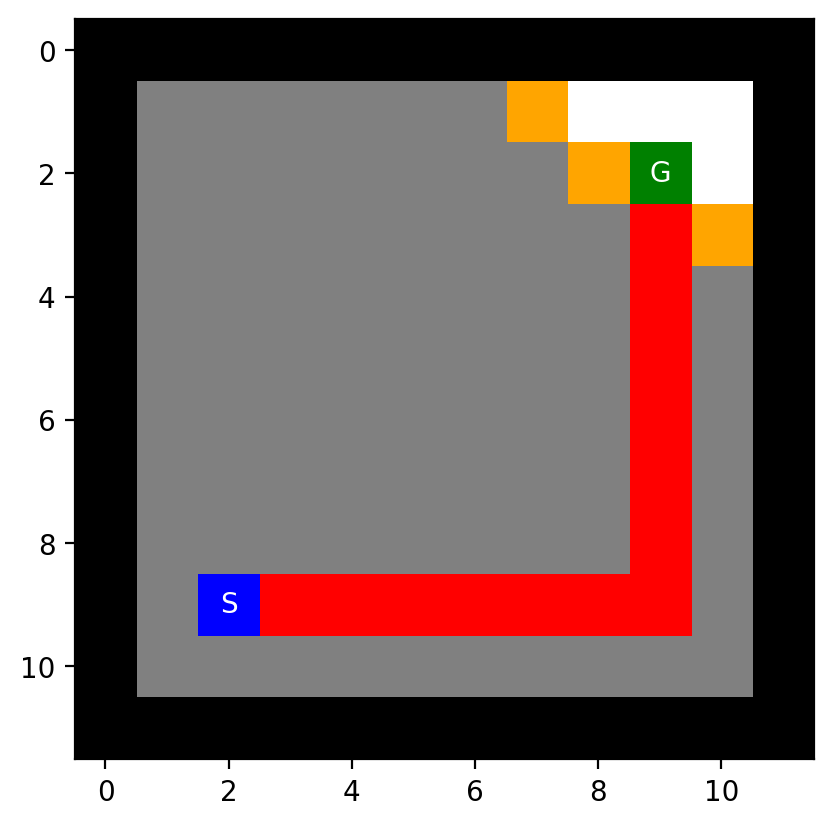

--------
Metrics:
Algorithm: BFS
Path Cost: 13
Nodes Expanded: 94
Max Tree Depth: 14
Max Nodes in Memory: 106
Max Frontier Size: 12
--------


In [10]:
%time
# Breadth First Search Implementation

bfsMaze = mh.parse_maze(maze_str)
bfs_metrics = breadthFirstSearch(bfsMaze, verbose=False)
mh.show_maze(bfsMaze) 


bfs_metrics.print_metrics()



#### Depth First Search

In [11]:
# Depth-First Search

def depthFirstSearch(maze, cutoffAmount=200, verbose=False):
    startState = mh.find_pos(maze, what="S")
    goalState = mh.find_pos(maze, what="G")

    currentNode = Node(pos=startState, parent=None, action=None, cost=0)
    if verbose:
        print(f"Start state: {startState}")
        print(f"Goal state: {goalState}")
        print(currentNode)

    if goalState == currentNode.pos:
        return Metrics([currentNode], 0, 0, 1, 0, 'DFS')

    frontier = [currentNode]  # Use a stack for DFS
    explored = set()  # Track explored nodes
    memory = set()  # Track all visited nodes

    max_tree_depth = 0  # Track the maximum tree depth
    max_frontier_size = 1  # Track the maximum size of the frontier
    nodes_expanded = 0  # Track the total number of nodes expanded
    path_cost = 0

    while frontier:
        current_node = frontier.pop()
        pos = current_node.pos

        if maze[pos[0], pos[1]] not in ['S', 'G']:
            maze[pos[0], pos[1]] = '.'

        if pos not in explored:
            explored.add(pos)

            if current_node.cost > max_tree_depth:
                max_tree_depth = current_node.cost

            if current_node.cost <= cutoffAmount:
                for action in getActions(maze, pos):
                    new_pos = move(pos, action)
                    

                    if new_pos not in memory:
                        if verbose:
                            print(f"Adding {new_pos} to frontier")

                        if new_pos == goalState:
                            path = current_node.get_path_from_root()
                            path_cost = current_node.cost

                            for node in path:
                                if node.parent is not None and maze[node.pos[0], node.pos[1]] not in ['S', 'G']:
                                    maze[node.pos[0], node.pos[1]] = 'P'

                            return Metrics(path, nodes_expanded, max_tree_depth, max_frontier_size, path_cost, 'DFS')
            
                        if maze[new_pos[0], new_pos[1]] not in ['S', 'G']:
                            maze[new_pos[0], new_pos[1]] = 'F'

                        frontier.append(
                            Node(pos=new_pos, parent=current_node, action=action, cost=current_node.cost + 1)
                        )

                        memory.add(new_pos)

                        if len(frontier) > max_frontier_size:
                            max_frontier_size = len(frontier)

                        nodes_expanded += 1

    return Metrics(None, nodes_expanded, max_tree_depth, max_frontier_size, -1, 'DFS')

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 1.91 µs


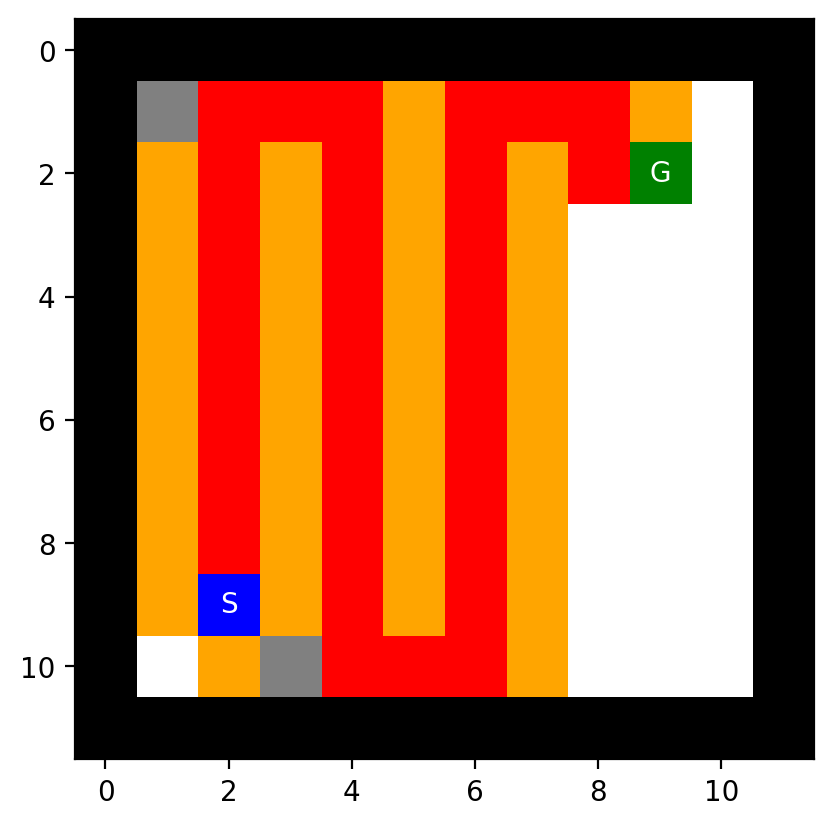

--------
Metrics:
Algorithm: DFS
Path Cost: 33
Nodes Expanded: 72
Max Tree Depth: 33
Max Nodes in Memory: 110
Max Frontier Size: 38
--------


In [12]:
%time
# Depth First Search Implementation

dfsMaze = mh.parse_maze(maze_str)
dfs_metrics = depthFirstSearch(dfsMaze, cutoffAmount=10000, verbose=False)
mh.show_maze(dfsMaze) 

dfs_metrics.print_metrics()


How does BFS and DFS deal with loops (cycles)?

Breadth-First Search 

My BFS implementation deals with loops (cycles) by keeping track of the nodes it has already visited. This is done using the explored set. When a node is expanded (i.e., when its successors are generated), it is added to the explored set. Then, before a new node is added to the frontier (the list of nodes to be explored), the algorithm checks if it is in the explored set. If it is, the node is not added to the frontier again. This prevents the algorithm from going in circles or loops.

Depth-First Search 

For my DFS implementation, the explored set is reinitialized as an empty set in each iteration of the while loop. Then, the position of the parent of the current node is added to the explored set. This means that the algorithm keeps track of the immediate parent of the current node to prevent it from going back directly to the parent, which would be a cycle.

Are your implementations complete and optimal? Explain why. What is the time and space complexity of each of **your** implementations?

Breadth-First Search

BFS is complete and optimal because it will find a solution that exists and find the optimal solution for the problem. Because BFS systematically explores all nodes at a given depth before proceeding to the next depth level, the time complexity of BFS is O(b^d), where b is the branching factor (the average number of successors per state) and d is the depth of the shallowest solution. The space complexity is also O(n^d), as it needs to store all nodes in memory.

Depth-First Search 

DFS is complete but not optimal since it may find a solution that is not the shortest. The time complexity of DFS is also O(b^d), but the space complexity is better than BFS, at O(n*m), where m is the maximum depth of any node (assuming the algorithm doesn't revisit nodes).



## Task 3: Informed search: Implement greedy best-first search and A* search  [20 Points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function. Both algorithms are based on Best-First search which requires only a small change from the BFS algorithm you have already implemented (see textbook/slides).

In [13]:
### Heuristic Function

def manhattan(pos1, pos2):
    """returns the Manhattan distance between two positions"""
    return(np.sum(np.abs(np.subtract(pos1, pos2))))
    
# print(manhattan((0,0), (1,1)))

def euclidean(pos1, pos2):
    """returns the Euclidean distance between two positions"""
    return(np.sqrt(np.sum(np.square(np.subtract(pos1, pos2)))))

# print(euclidean([0,0], [1,1]))


In [14]:
# Greedy Best-First Search

def bestFirstSearch(maze, verbose=False):
    startState = mh.find_pos(maze, what="S")
    goalState = mh.find_pos(maze, what="G")

    currentNode = Node(pos=startState, parent=None, action=None, cost=0)
    
    if verbose: 
        print(f"Start state: {startState}")
        print(f"Goal state: {goalState}")
        print(currentNode)

    if goalState == currentNode.pos:
        return Metrics([currentNode], 0, 0, 1, 0, "Greedy Best-First Search")

    frontier = [currentNode]
    explored = set()

    max_tree_depth = 0     # Track the maximum tree depth
    max_frontier_size = 1  # Track the maximum size of the frontier
    nodes_expanded = 0     # Track the total number of nodes expanded
    path_cost = 0

    while frontier:
        currentNode = frontier.pop(0)
        pos = currentNode.pos

        if maze[pos[0], pos[1]] not in ['S', 'G']:
            maze[pos[0], pos[1]] = '.' # Mark as explored 

        explored.add(pos)

        if verbose:
            print(f"Exploring {pos}")

        for action in getActions(maze, pos):
            newPos = move(pos, action)
            if newPos not in explored:
                if verbose: print(f"Adding {newPos} to frontier")
                
                if newPos == goalState:
                    path = currentNode.get_path_from_root()
                    path_cost = currentNode.cost
                    
                    for node in path:
                        if node.parent is not None:
                            maze[node.pos[0], node.pos[1]] = 'P'
                    
                    return Metrics(path, nodes_expanded, max_tree_depth, max_frontier_size, path_cost, "Greedy Best-First Search")

                maze[newPos[0], newPos[1]] = 'F' # Mark as frontier

                frontier.append(Node(pos=newPos, parent=currentNode, action=action, cost=currentNode.cost + 1))
                
                if currentNode.cost > max_tree_depth:
                    max_tree_depth = currentNode.cost

                explored.add(newPos)

                if len(frontier) > max_frontier_size:
                    max_frontier_size = len(frontier)

                nodes_expanded += 1

        

        frontier.sort(key=lambda x: manhattan(x.pos, goalState))


    return Metrics(None, nodes_expanded, max_tree_depth, max_frontier_size, -1, "Greedy Best-First Search")



CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 3.1 µs


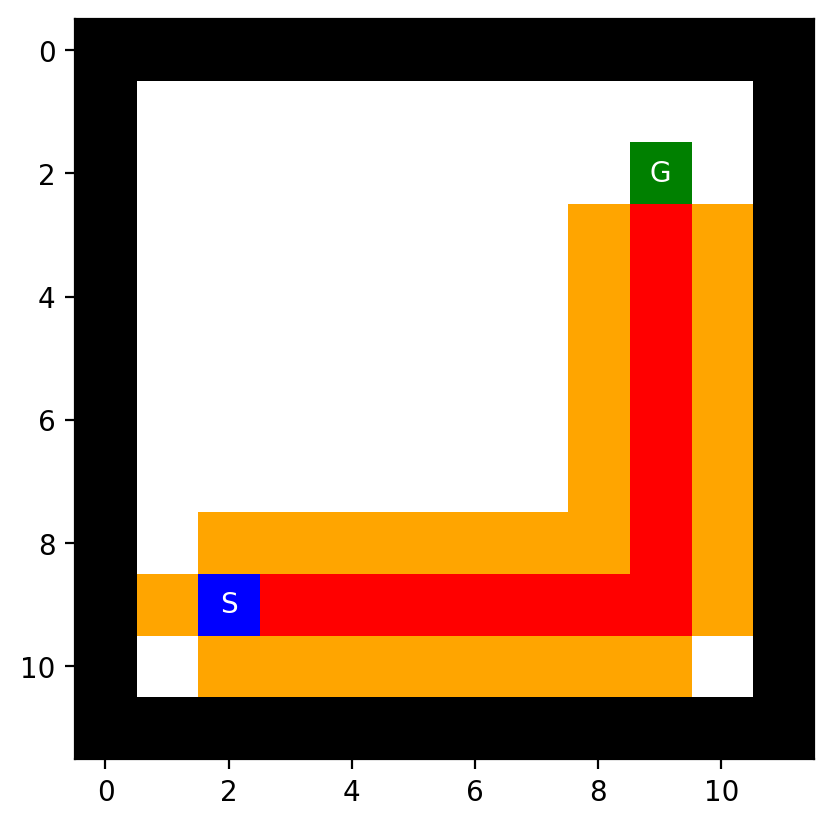

--------
Metrics:
Algorithm: Greedy Best-First Search
Path Cost: 13
Nodes Expanded: 41
Max Tree Depth: 13
Max Nodes in Memory: 69
Max Frontier Size: 28
--------


In [15]:
%time
# Best-First Search Implementation

greedy_bfs_maze = maze.copy()
greedy_bfs_Metric = bestFirstSearch(greedy_bfs_maze, verbose=False)
mh.show_maze(greedy_bfs_maze) 

greedy_bfs_Metric.print_metrics()


In [16]:
# A* Search

def aStarSearch(maze, verbose=False):
    startState = mh.find_pos(maze, what="S")
    goalState = mh.find_pos(maze, what="G")

    currentNode = Node(pos=startState, parent=None, action=None, cost=0)
    if verbose: 
        print(f"Start state: {startState}")
        print(f"Goal state: {goalState}")
        print(currentNode)

    if goalState == currentNode.pos:
        return Metrics([currentNode], 0, 0, 1, 0, "A* Search")

    frontier = [currentNode]
    explored = set()

    max_tree_depth = 0     # Track the maximum tree depth
    max_frontier_size = 1  # Track the maximum size of the frontier
    nodes_expanded = 0     # Track the total number of nodes expanded
    path_cost = 0

    while frontier:
        currentNode = frontier.pop(0)
        pos = currentNode.pos

        if maze[pos[0], pos[1]] not in ['S', 'G']:
            maze[pos[0], pos[1]] = '.' # Mark as explored 

        explored.add(pos)

        if verbose:
            print(f"Exploring {pos}")

        if currentNode.cost > max_tree_depth:
            max_tree_depth = currentNode.cost

        for action in getActions(maze, pos):
            newPos = move(pos, action)
            if newPos not in explored:
                if verbose: print(f"Adding {newPos} to frontier")
                
                if newPos == goalState:
                    path = currentNode.get_path_from_root()
                    
                    for node in path:
                        if node.parent is not None:
                            maze[node.pos[0], node.pos[1]] = 'P'  # Mark current path
                    
                    path_cost = currentNode.cost

                    return Metrics(path, nodes_expanded, max_tree_depth, max_frontier_size, path_cost, "A* Search")

                maze[newPos[0], newPos[1]] = 'F' # Mark as frontier

                frontier.append(Node(pos=newPos, parent=currentNode, action=action, cost=currentNode.cost + 1))
                
                if len(frontier) > max_frontier_size:
                    max_frontier_size = len(frontier)

                nodes_expanded += 1

                if currentNode.cost > max_tree_depth:
                    max_tree_depth = currentNode.cost

                explored.add(newPos)
        
        frontier.sort(key=lambda x: x.cost + manhattan(x.pos, goalState))

    return Metrics(None, nodes_expanded, max_tree_depth, max_frontier_size, -1, "A* Search")
    

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs


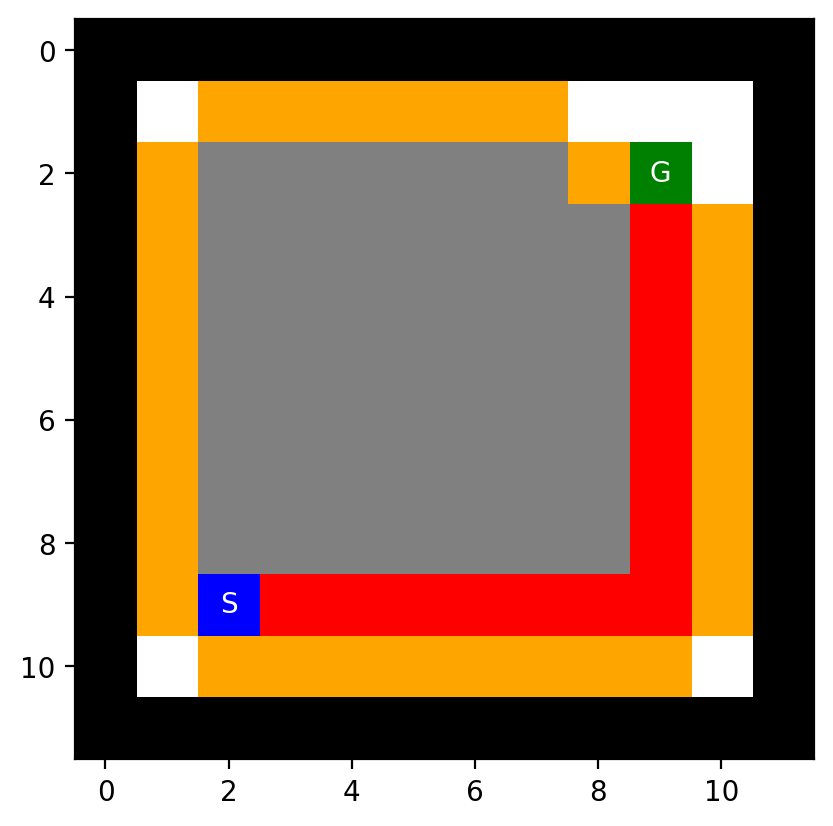

--------
Metrics:
Algorithm: A* Search
Path Cost: 13
Nodes Expanded: 91
Max Tree Depth: 13
Max Nodes in Memory: 121
Max Frontier Size: 30
--------


In [17]:
%time
# A* Search Implementation

a_star_maze = maze.copy()
a_star_Metric = aStarSearch(a_star_maze, verbose=False)
mh.show_maze(a_star_maze)

a_star_Metric.print_metrics()


Are your implementations complete and optimal? What is the time and space complexity?

Both Greedy Best-First Search and A* Search are complete algorithms.

A* Search is an optimal algorithm, meaning that it is guaranteed to find the shortest path from the start state to the goal state. However, Greedy Best-First Search is not guaranteed to find the shortest path. It may find a suboptimal path depending on the heuristic function used.

The time complexity for A* is O(b^d) where n is the branching factor and d is the depth of the solution, but it usally has a lower branching factor than other implementations. The space complexity is O(b^d) because every visited node is kept in memory. The Greedy Best-First Search would end up checking every state

## Task 4: Comparison and discussion [20 Points]

Run experiments to compare the implemented algorithms.

How to deal with issues:

* Your implementation returns unexpected results: Try to debug and fix the code. Visualizing the maze, the current path and the frontier after every step is very helpful. If the code still does not work, then mark the result with an asterisk (*) and describe the issue below the table.

* Your implementation cannot consistently solve a specific maze and ends up in an infinite loop:
    Debug. If it is a shortcoming of the algorithm/implementation, then put "N/A*" in the results table and describe why this is happening.

small_maze.txt


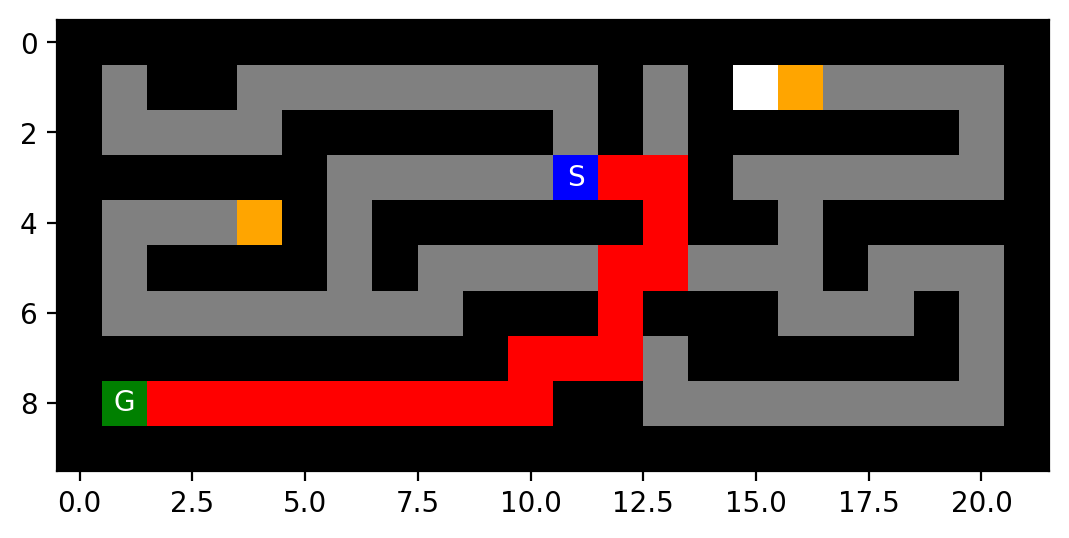

Breadth-First Search
--------
Metrics:
Algorithm: BFS
Path Cost: 18
Nodes Expanded: 91
Max Tree Depth: 19
Max Nodes in Memory: 100
Max Frontier Size: 9
--------


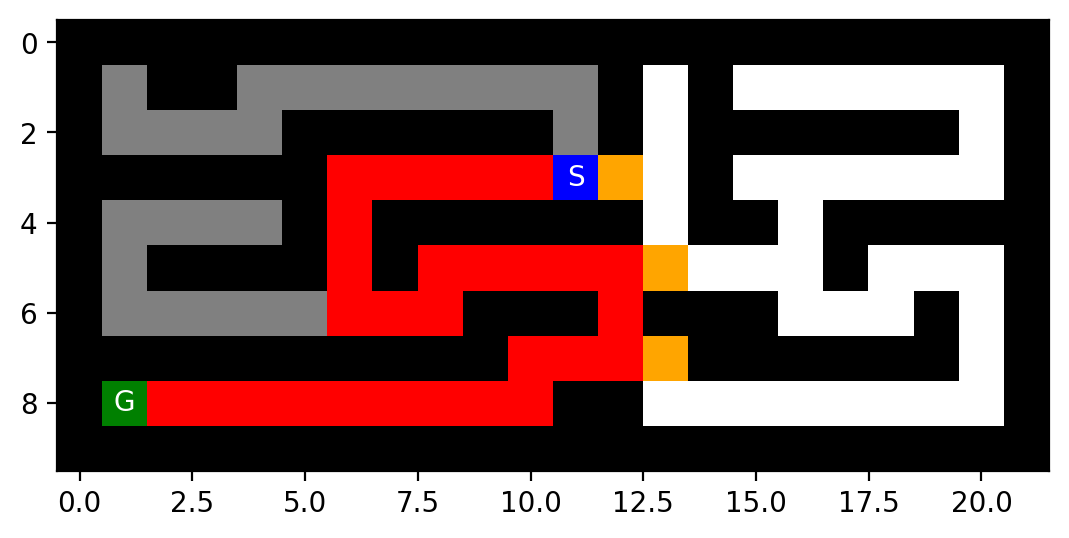

Depth-First Search
--------
Metrics:
Algorithm: DFS
Path Cost: 28
Nodes Expanded: 56
Max Tree Depth: 28
Max Nodes in Memory: 60
Max Frontier Size: 4
--------


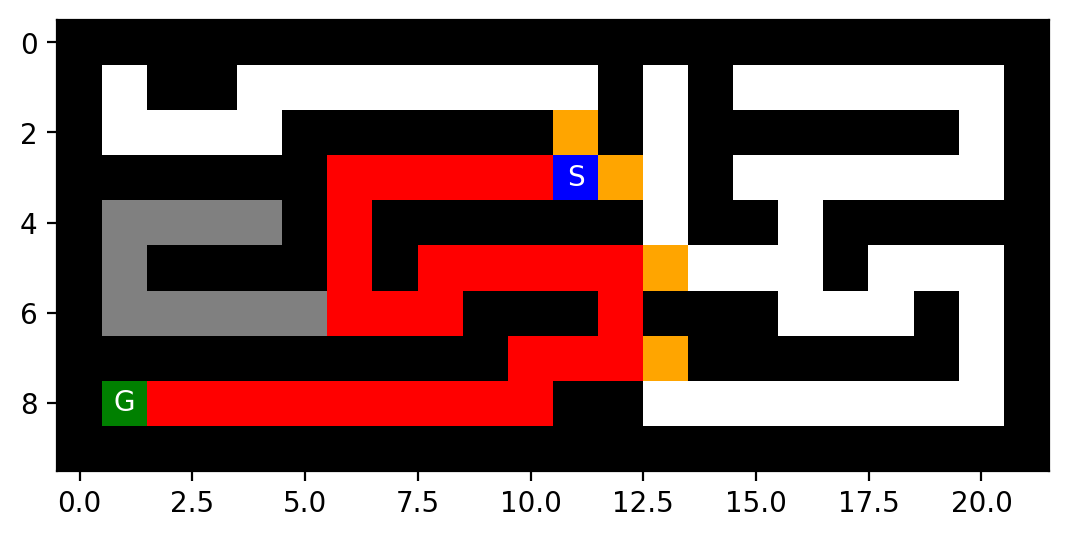

Greedy Breadth-First Search
--------
Metrics:
Algorithm: Greedy Best-First Search
Path Cost: 28
Nodes Expanded: 42
Max Tree Depth: 27
Max Nodes in Memory: 47
Max Frontier Size: 5
--------


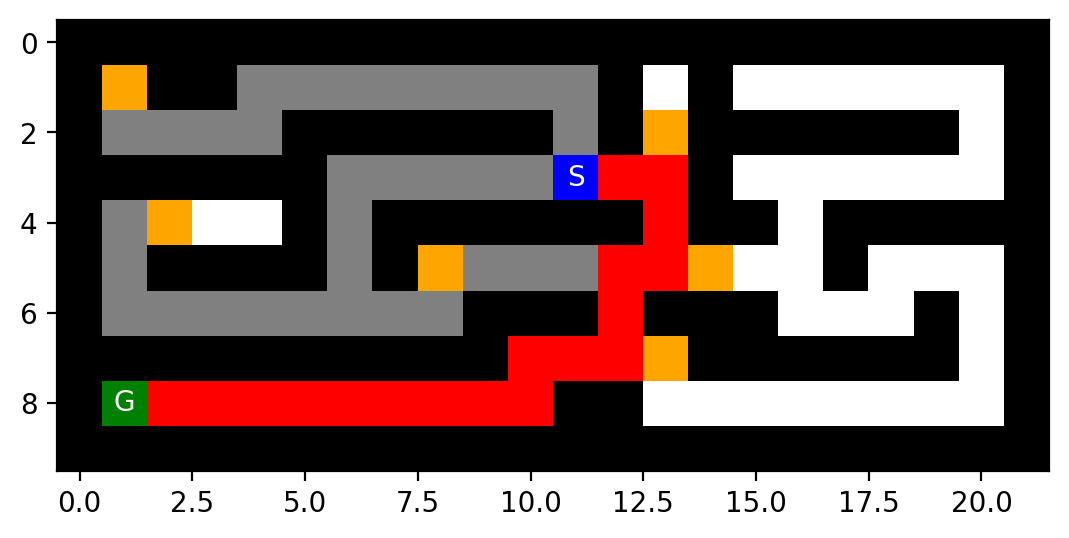

A* Search
--------
Metrics:
Algorithm: A* Search
Path Cost: 18
Nodes Expanded: 57
Max Tree Depth: 18
Max Nodes in Memory: 65
Max Frontier Size: 8
--------
medium_maze.txt


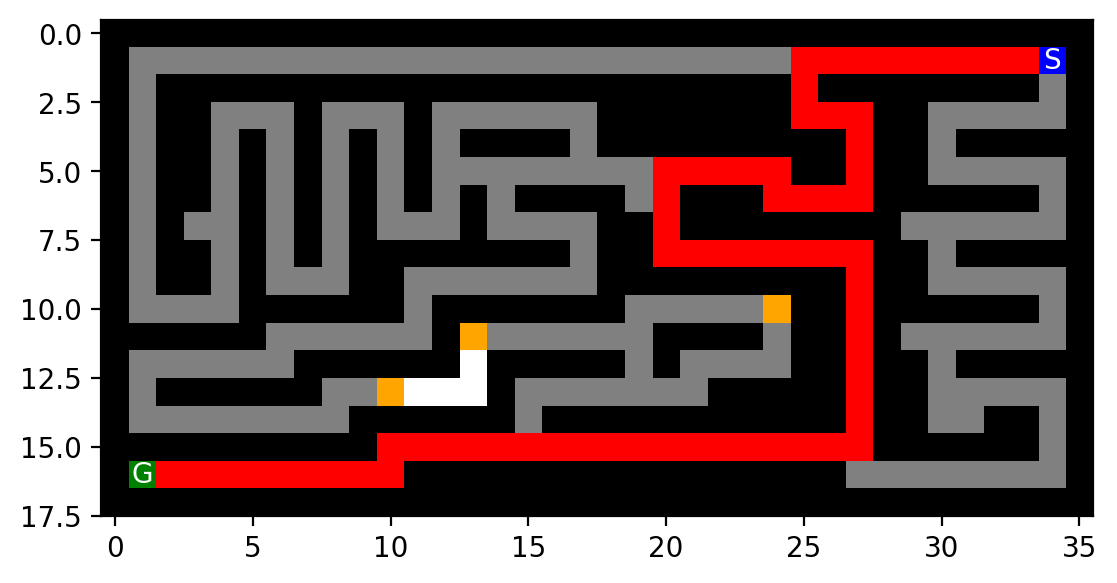

Breadth-First Search
--------
Metrics:
Algorithm: BFS
Path Cost: 67
Nodes Expanded: 268
Max Tree Depth: 68
Max Nodes in Memory: 276
Max Frontier Size: 8
--------


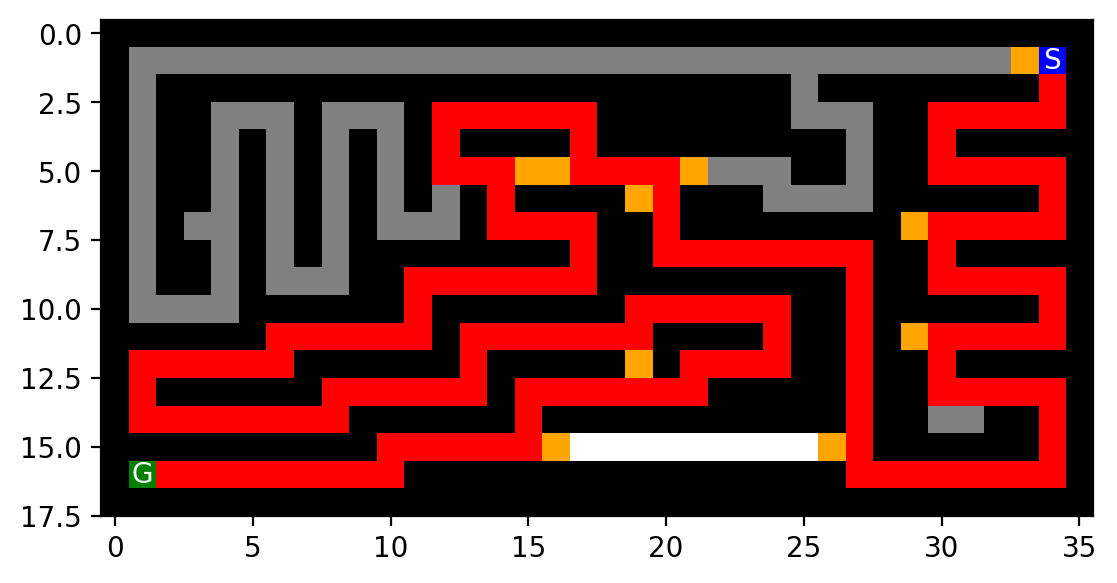

Depth-First Search
--------
Metrics:
Algorithm: DFS
Path Cost: 161
Nodes Expanded: 264
Max Tree Depth: 161
Max Nodes in Memory: 275
Max Frontier Size: 11
--------


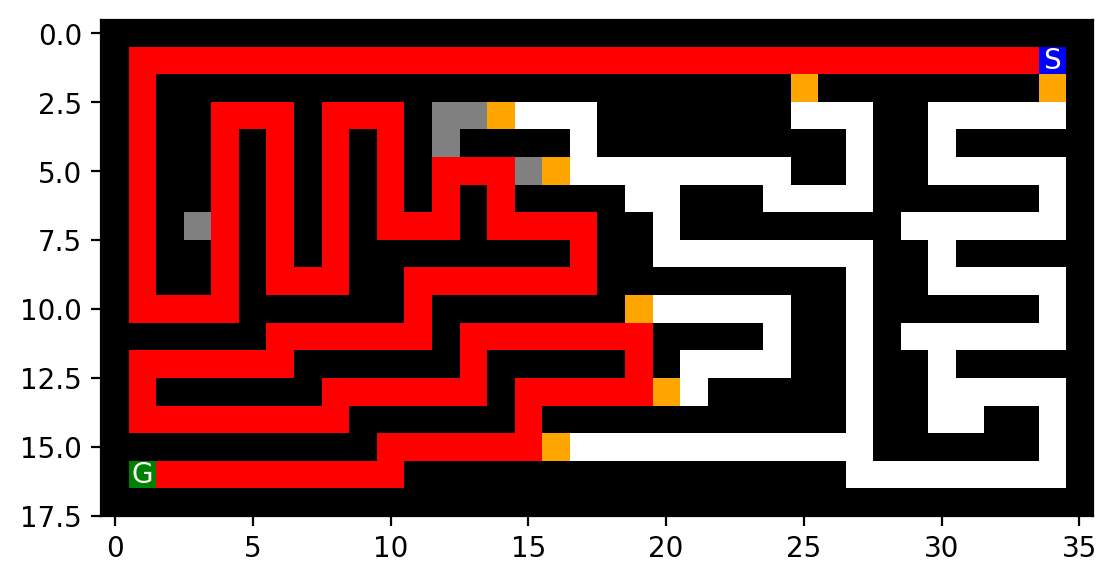

Greedy Breadth-First Search
--------
Metrics:
Algorithm: Greedy Best-First Search
Path Cost: 151
Nodes Expanded: 163
Max Tree Depth: 150
Max Nodes in Memory: 171
Max Frontier Size: 8
--------


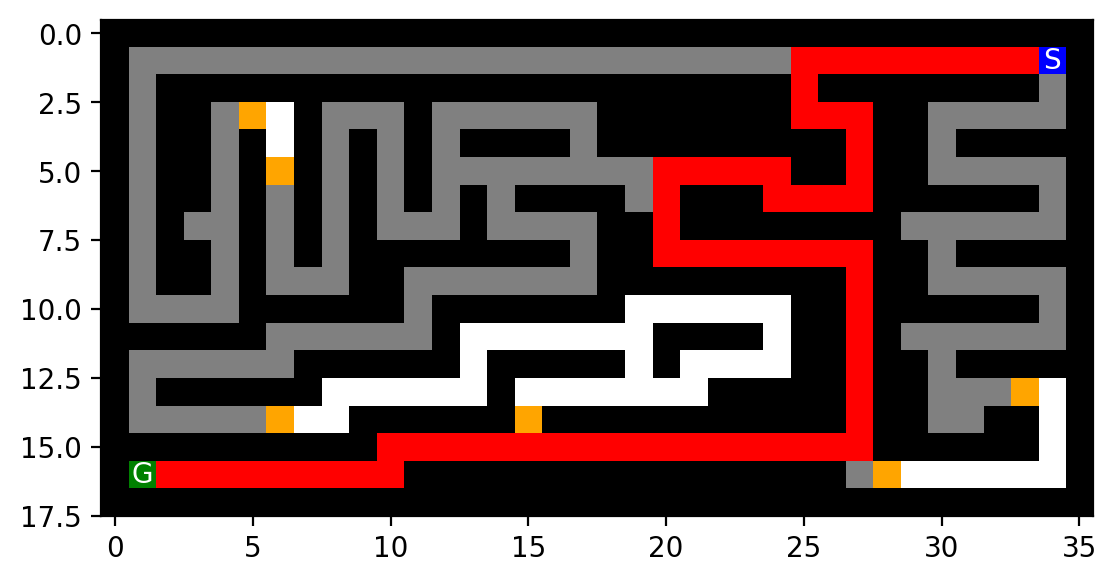

A* Search
--------
Metrics:
Algorithm: A* Search
Path Cost: 67
Nodes Expanded: 226
Max Tree Depth: 67
Max Nodes in Memory: 234
Max Frontier Size: 8
--------
large_maze.txt


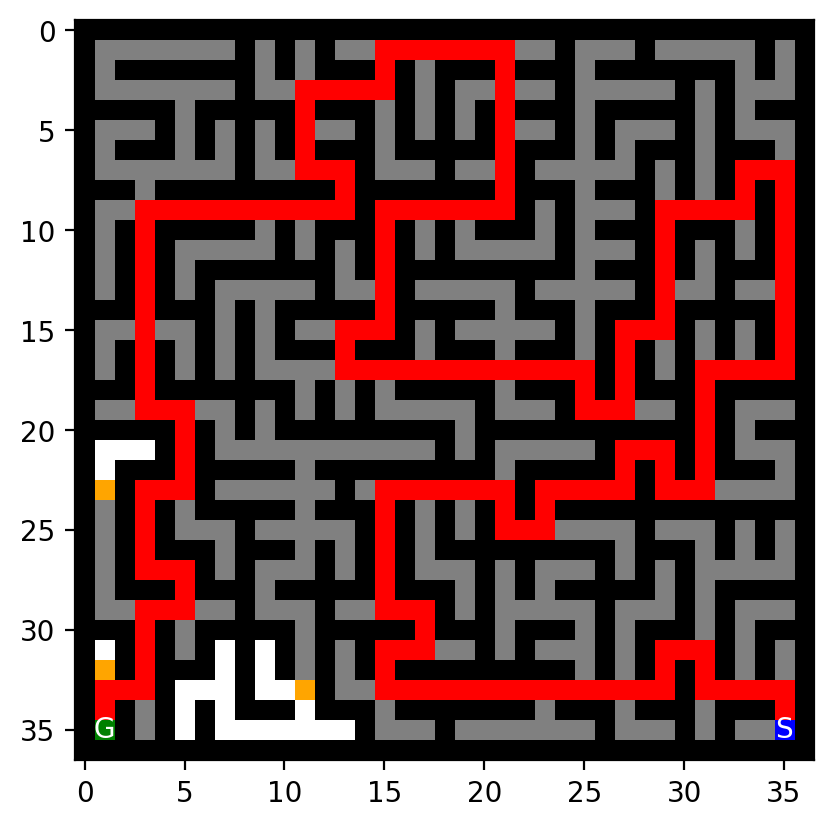

Breadth-First Search
--------
Metrics:
Algorithm: BFS
Path Cost: 209
Nodes Expanded: 620
Max Tree Depth: 210
Max Nodes in Memory: 628
Max Frontier Size: 8
--------


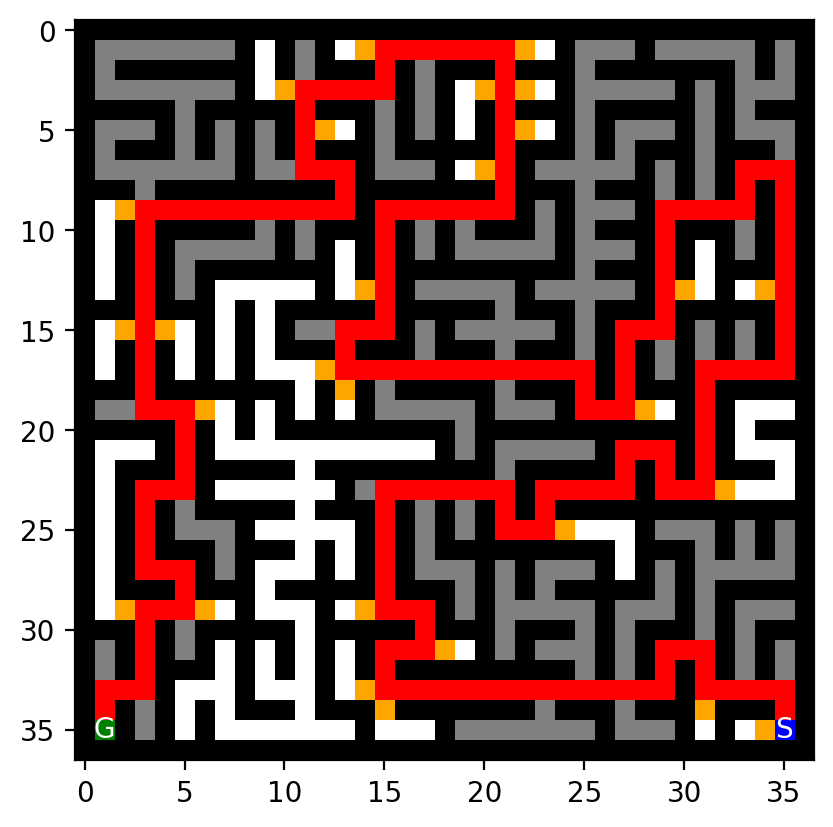

Depth-First Search
--------
Metrics:
Algorithm: DFS
Path Cost: 209
Nodes Expanded: 497
Max Tree Depth: 210
Max Nodes in Memory: 528
Max Frontier Size: 31
--------


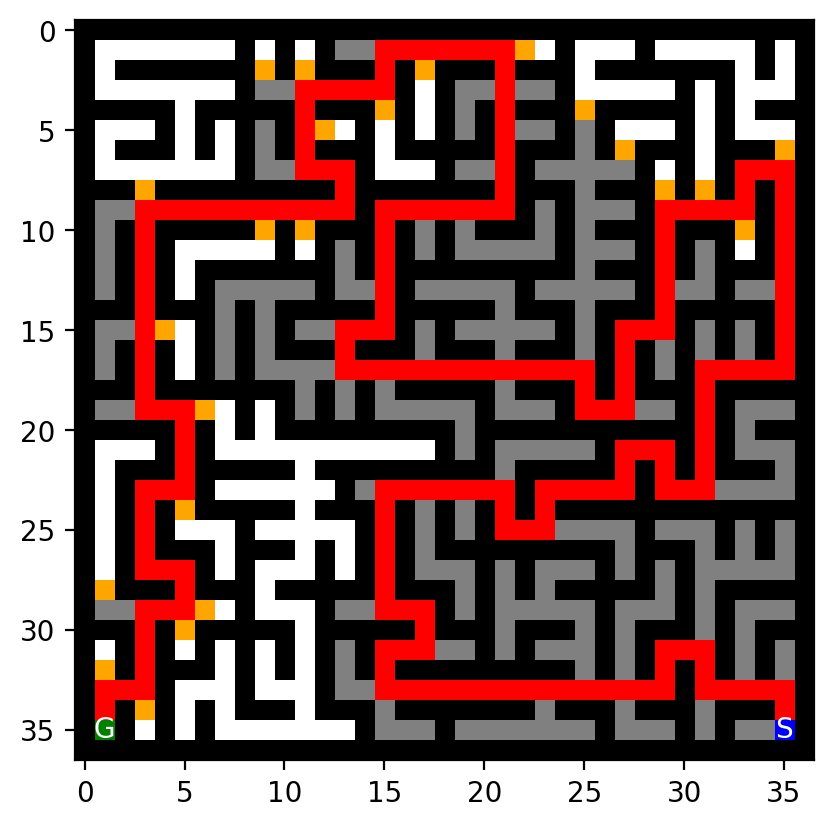

Greedy Breadth-First Search
--------
Metrics:
Algorithm: Greedy Best-First Search
Path Cost: 209
Nodes Expanded: 477
Max Tree Depth: 208
Max Nodes in Memory: 501
Max Frontier Size: 24
--------


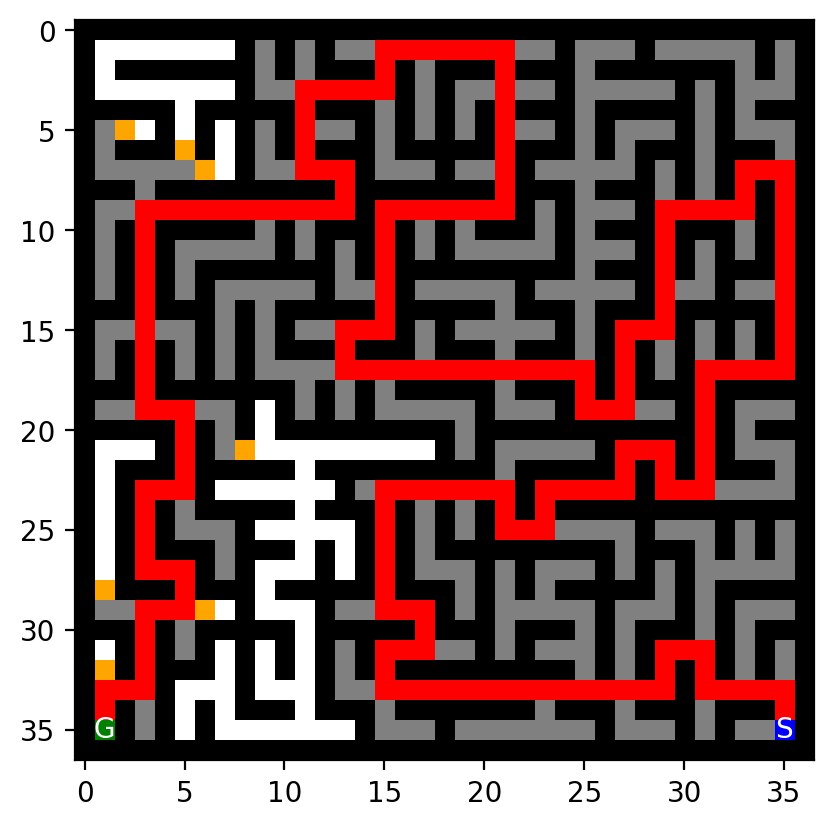

A* Search
--------
Metrics:
Algorithm: A* Search
Path Cost: 209
Nodes Expanded: 555
Max Tree Depth: 209
Max Nodes in Memory: 567
Max Frontier Size: 12
--------
loops_maze.txt


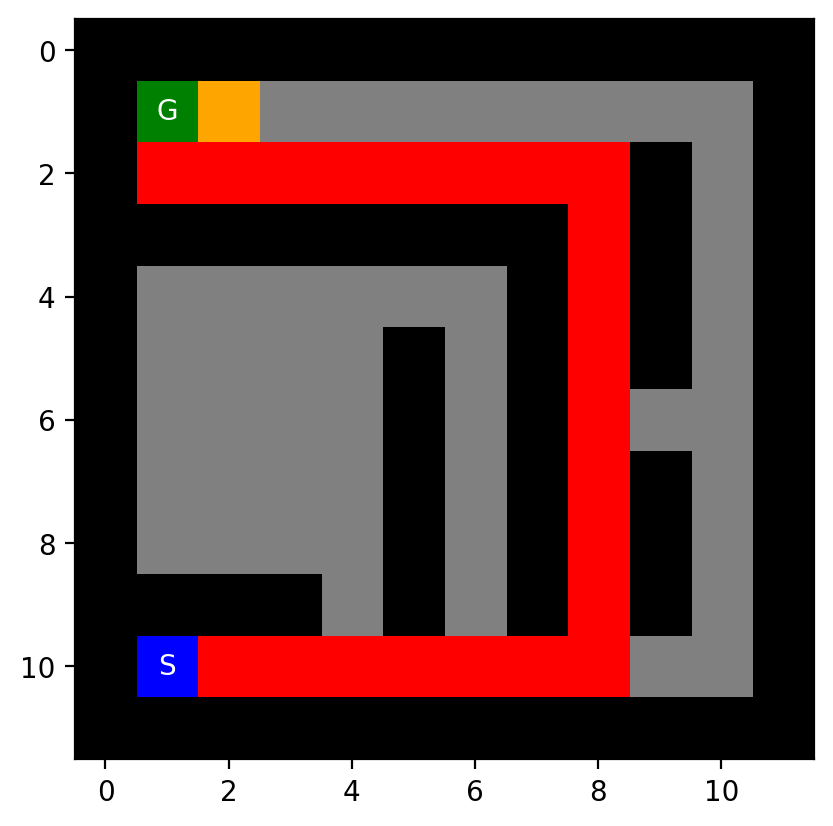

Breadth-First Search
--------
Metrics:
Algorithm: BFS
Path Cost: 22
Nodes Expanded: 70
Max Tree Depth: 22
Max Nodes in Memory: 77
Max Frontier Size: 7
--------


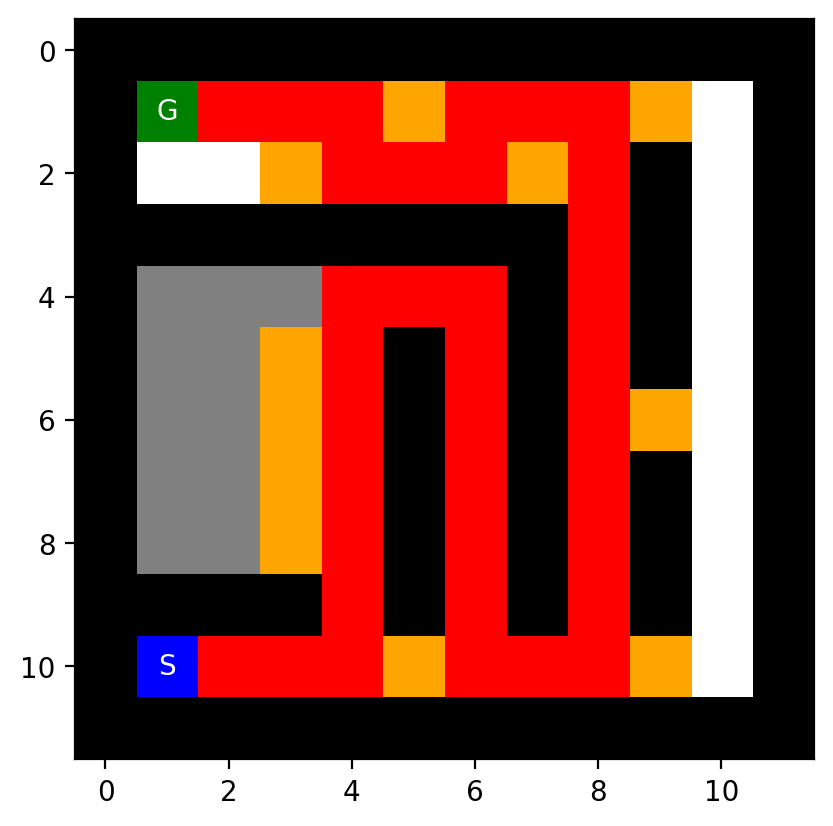

Depth-First Search
--------
Metrics:
Algorithm: DFS
Path Cost: 36
Nodes Expanded: 59
Max Tree Depth: 36
Max Nodes in Memory: 71
Max Frontier Size: 12
--------


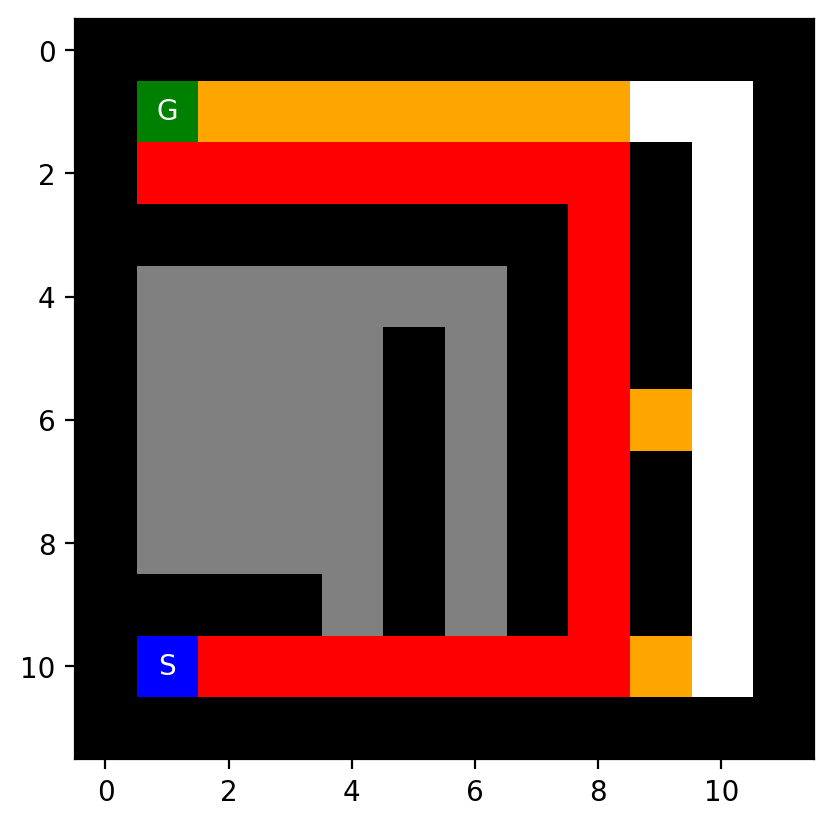

Greedy Breadth-First Search
--------
Metrics:
Algorithm: Greedy Best-First Search
Path Cost: 22
Nodes Expanded: 59
Max Tree Depth: 21
Max Nodes in Memory: 69
Max Frontier Size: 10
--------


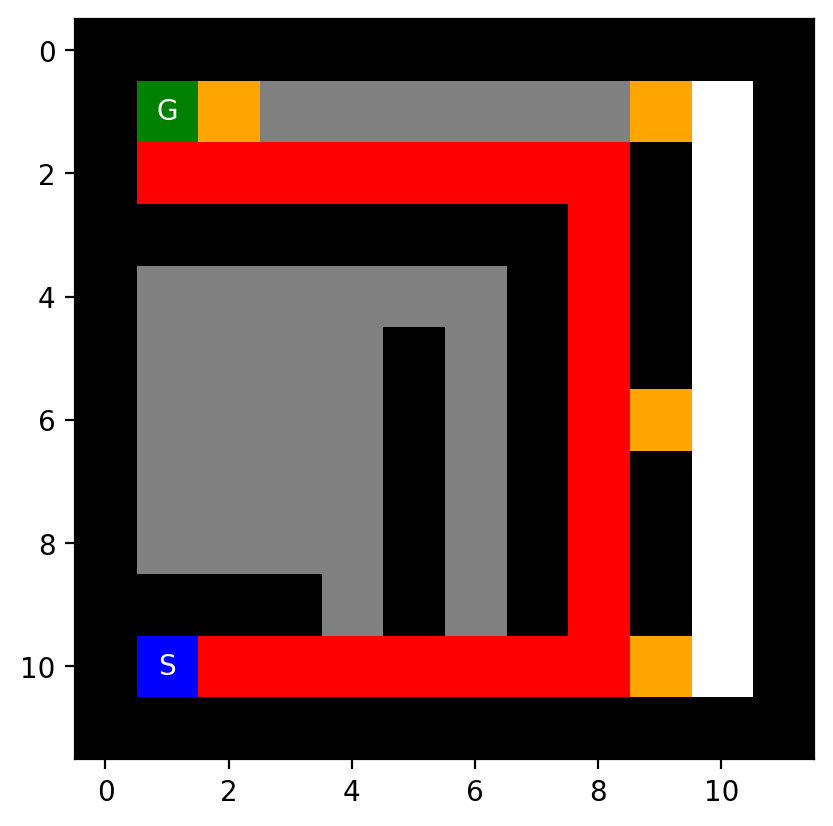

A* Search
--------
Metrics:
Algorithm: A* Search
Path Cost: 22
Nodes Expanded: 60
Max Tree Depth: 22
Max Nodes in Memory: 66
Max Frontier Size: 6
--------
open_maze.txt


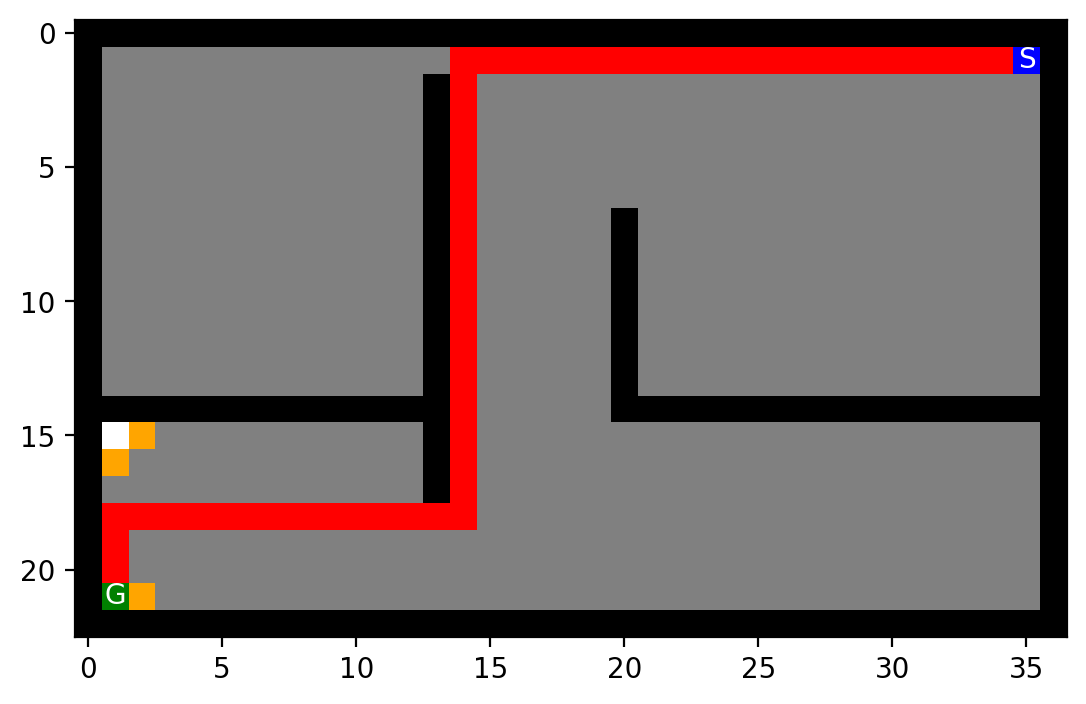

Breadth-First Search
--------
Metrics:
Algorithm: BFS
Path Cost: 53
Nodes Expanded: 681
Max Tree Depth: 53
Max Nodes in Memory: 704
Max Frontier Size: 23
--------


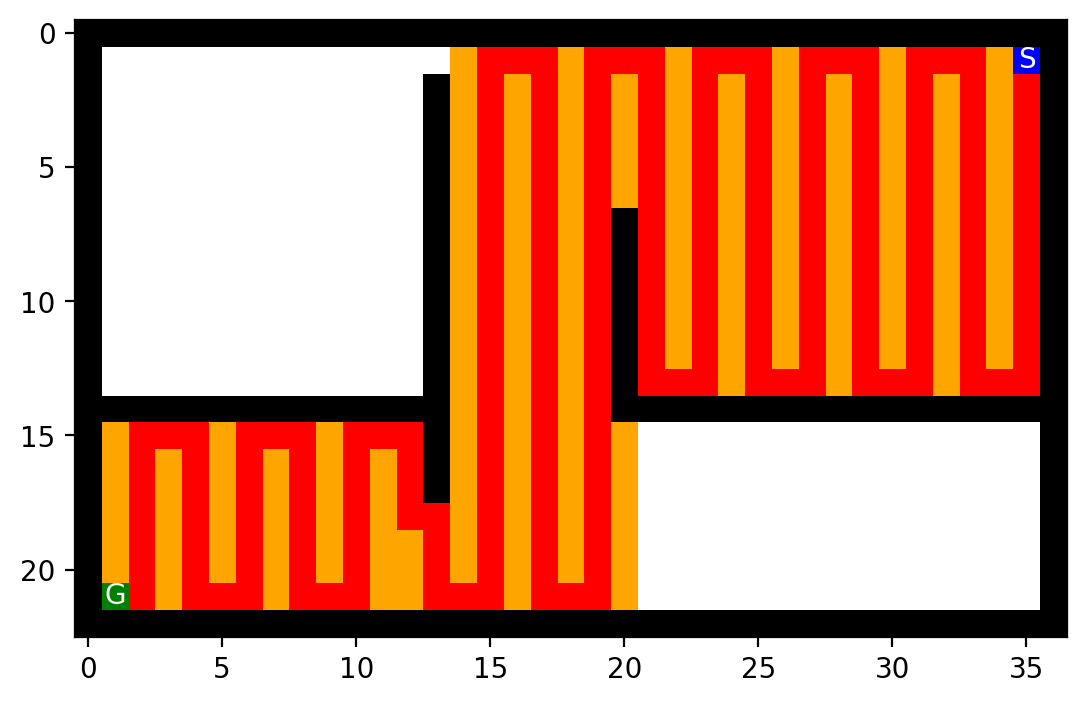

Depth-First Search
--------
Metrics:
Algorithm: DFS
Path Cost: 225
Nodes Expanded: 421
Max Tree Depth: 225
Max Nodes in Memory: 617
Max Frontier Size: 196
--------


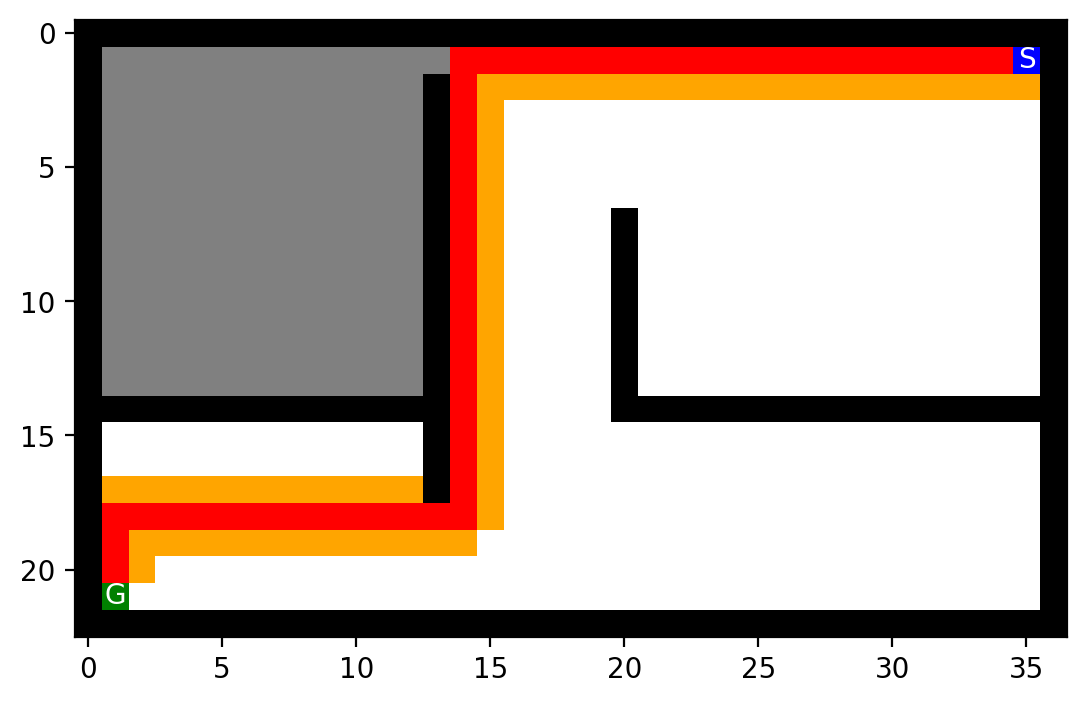

Greedy Breadth-First Search
--------
Metrics:
Algorithm: Greedy Best-First Search
Path Cost: 53
Nodes Expanded: 273
Max Tree Depth: 56
Max Nodes in Memory: 336
Max Frontier Size: 63
--------


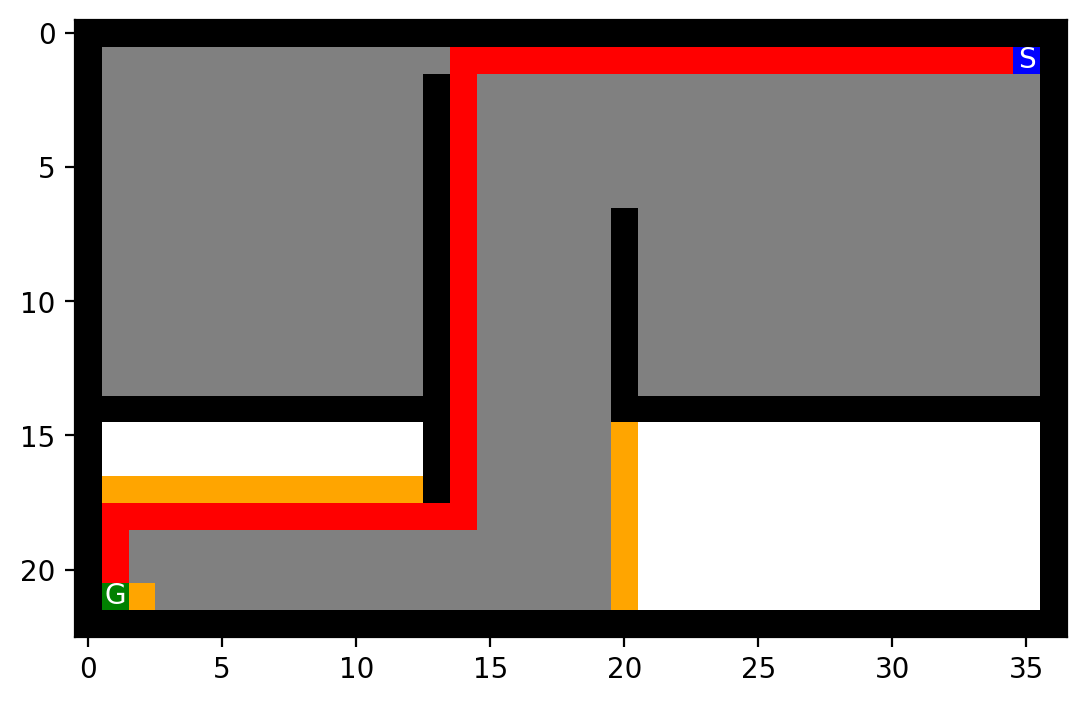

A* Search
--------
Metrics:
Algorithm: A* Search
Path Cost: 53
Nodes Expanded: 553
Max Tree Depth: 53
Max Nodes in Memory: 576
Max Frontier Size: 23
--------
empty_maze.txt


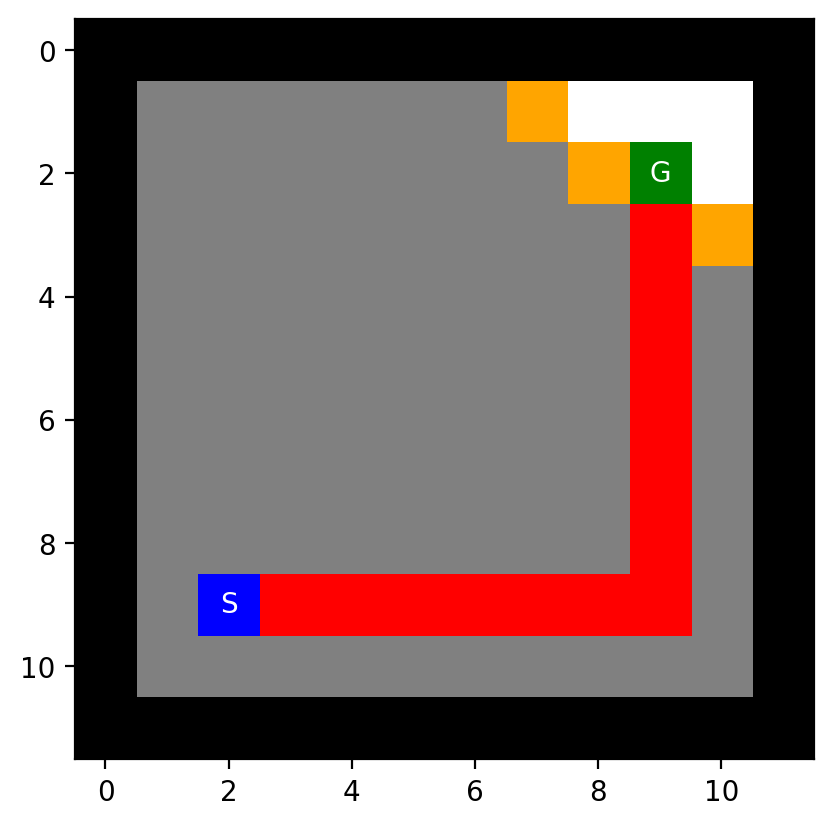

Breadth-First Search
--------
Metrics:
Algorithm: BFS
Path Cost: 13
Nodes Expanded: 94
Max Tree Depth: 14
Max Nodes in Memory: 106
Max Frontier Size: 12
--------


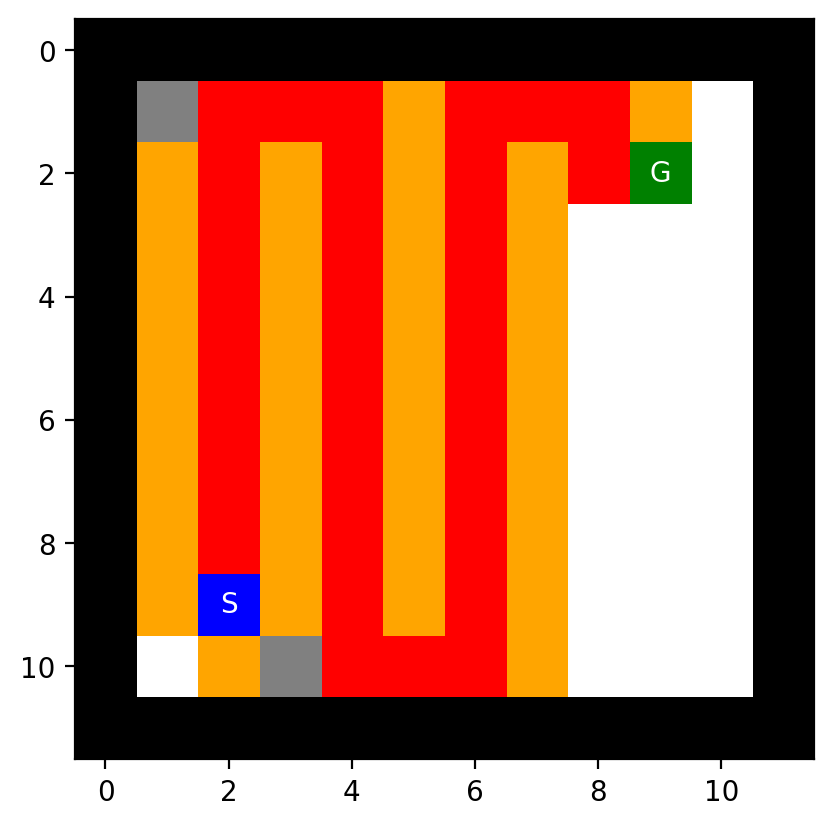

Depth-First Search
--------
Metrics:
Algorithm: DFS
Path Cost: 33
Nodes Expanded: 72
Max Tree Depth: 33
Max Nodes in Memory: 110
Max Frontier Size: 38
--------


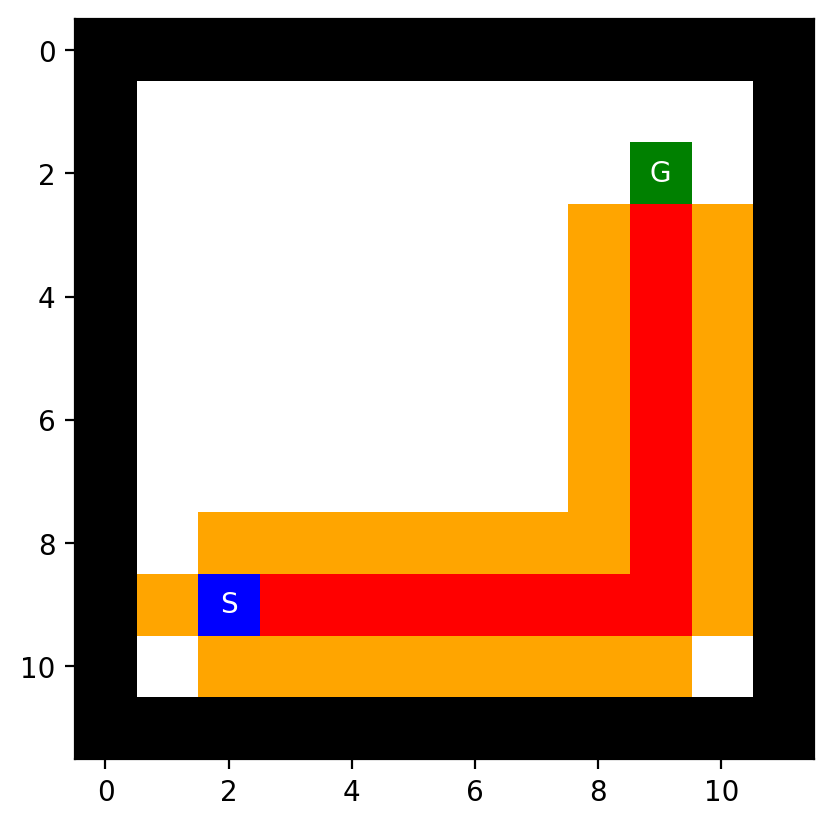

Greedy Breadth-First Search
--------
Metrics:
Algorithm: Greedy Best-First Search
Path Cost: 13
Nodes Expanded: 41
Max Tree Depth: 13
Max Nodes in Memory: 69
Max Frontier Size: 28
--------


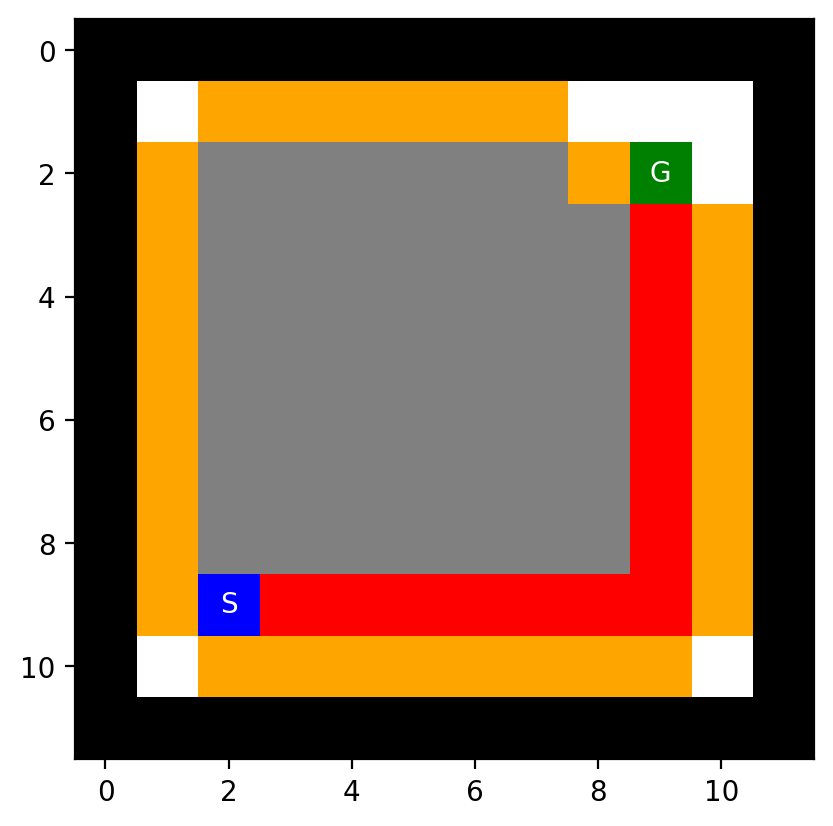

A* Search
--------
Metrics:
Algorithm: A* Search
Path Cost: 13
Nodes Expanded: 91
Max Tree Depth: 13
Max Nodes in Memory: 121
Max Frontier Size: 30
--------
empty_2_maze.txt


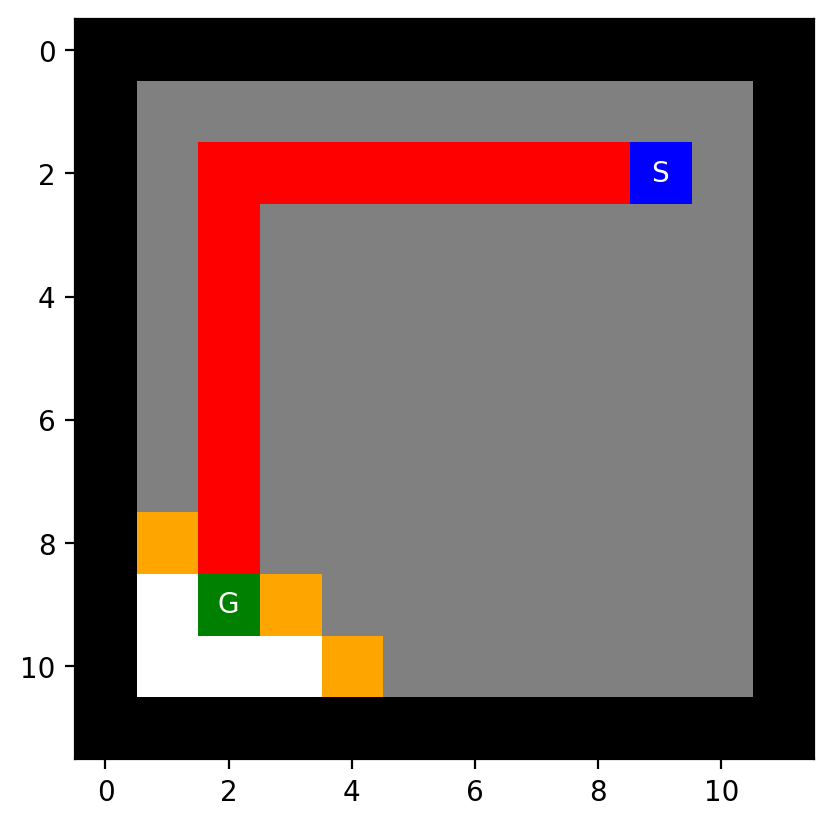

Breadth-First Search
--------
Metrics:
Algorithm: BFS
Path Cost: 13
Nodes Expanded: 94
Max Tree Depth: 14
Max Nodes in Memory: 106
Max Frontier Size: 12
--------


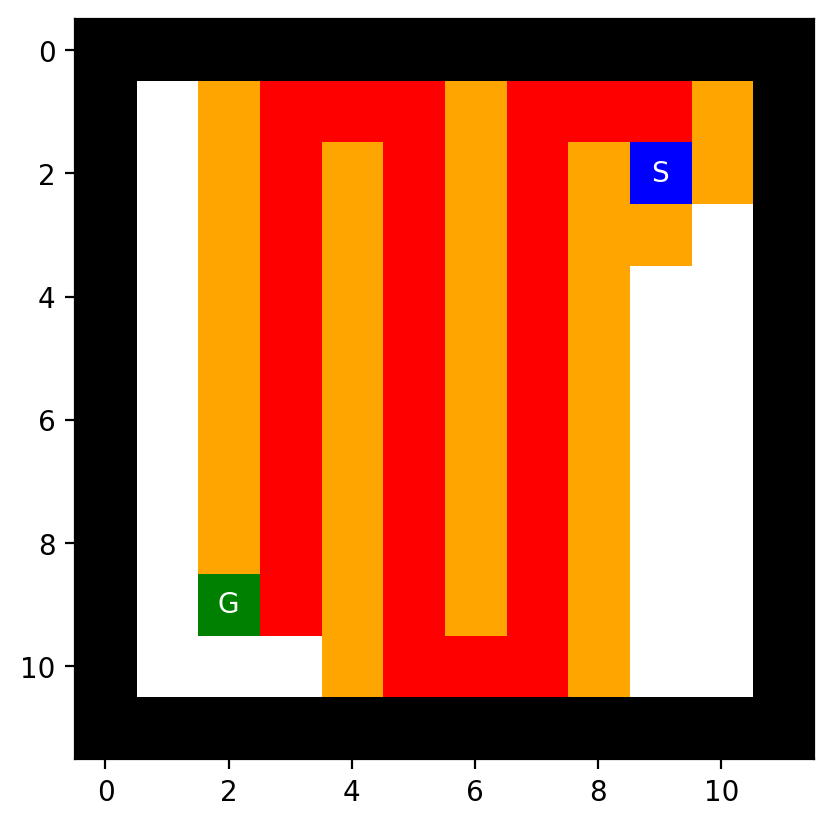

Depth-First Search
--------
Metrics:
Algorithm: DFS
Path Cost: 33
Nodes Expanded: 72
Max Tree Depth: 33
Max Nodes in Memory: 111
Max Frontier Size: 39
--------


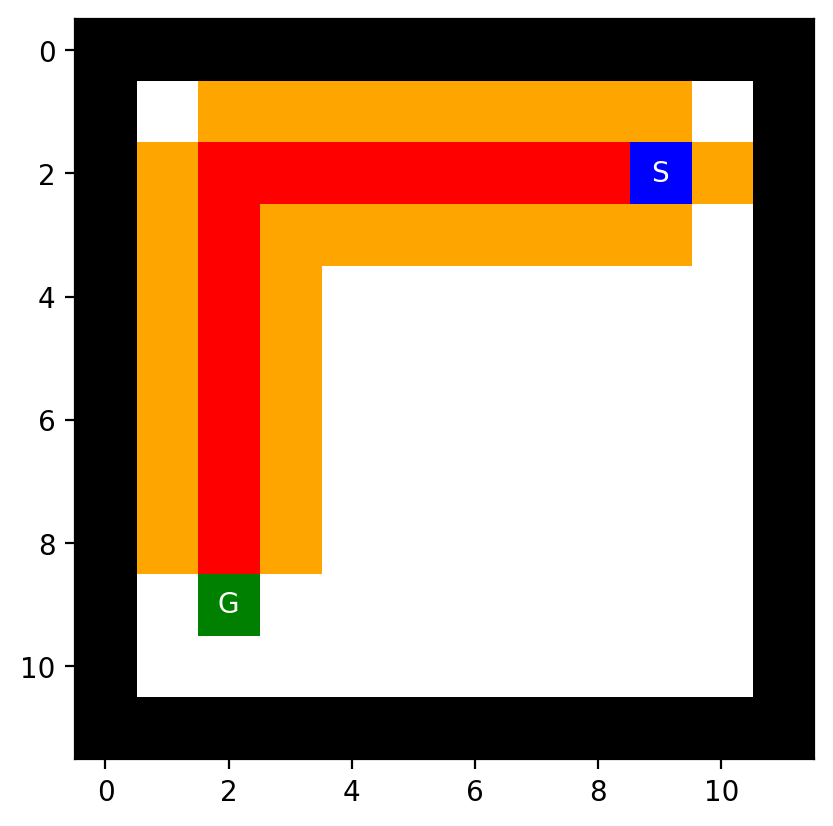

Greedy Breadth-First Search
--------
Metrics:
Algorithm: Greedy Best-First Search
Path Cost: 13
Nodes Expanded: 41
Max Tree Depth: 13
Max Nodes in Memory: 69
Max Frontier Size: 28
--------


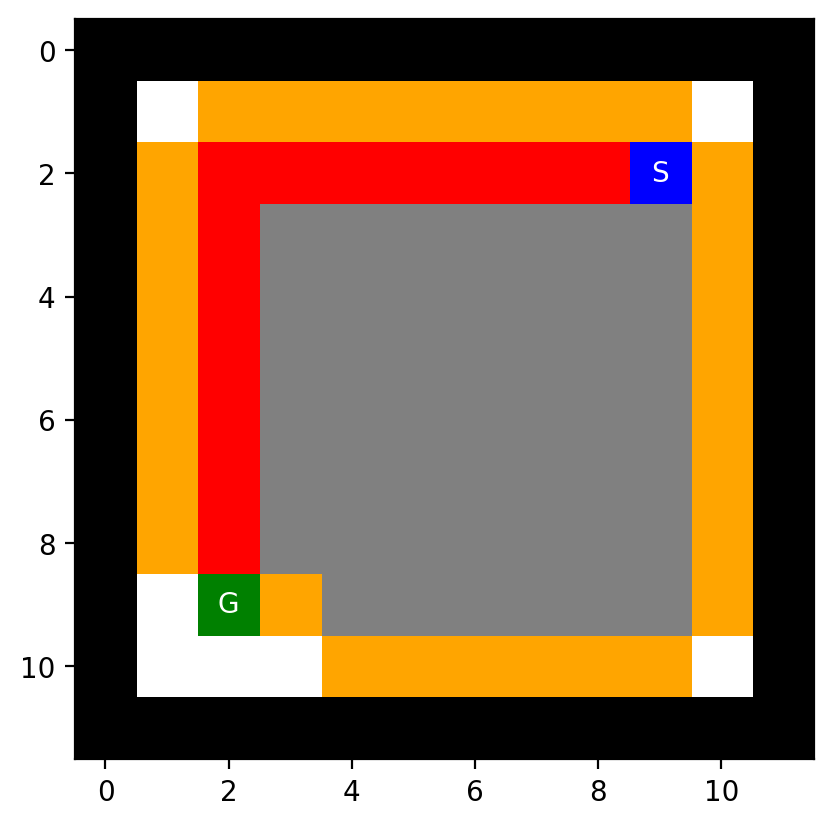

A* Search
--------
Metrics:
Algorithm: A* Search
Path Cost: 13
Nodes Expanded: 91
Max Tree Depth: 13
Max Nodes in Memory: 121
Max Frontier Size: 30
--------
L_maze.txt


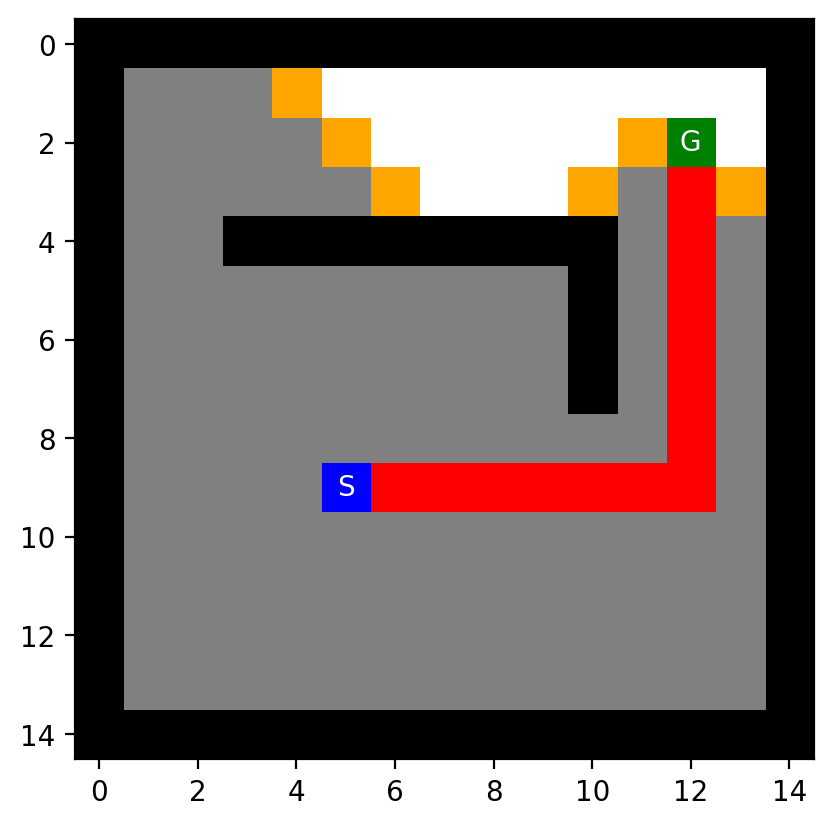

Breadth-First Search
--------
Metrics:
Algorithm: BFS
Path Cost: 13
Nodes Expanded: 138
Max Tree Depth: 14
Max Nodes in Memory: 157
Max Frontier Size: 19
--------


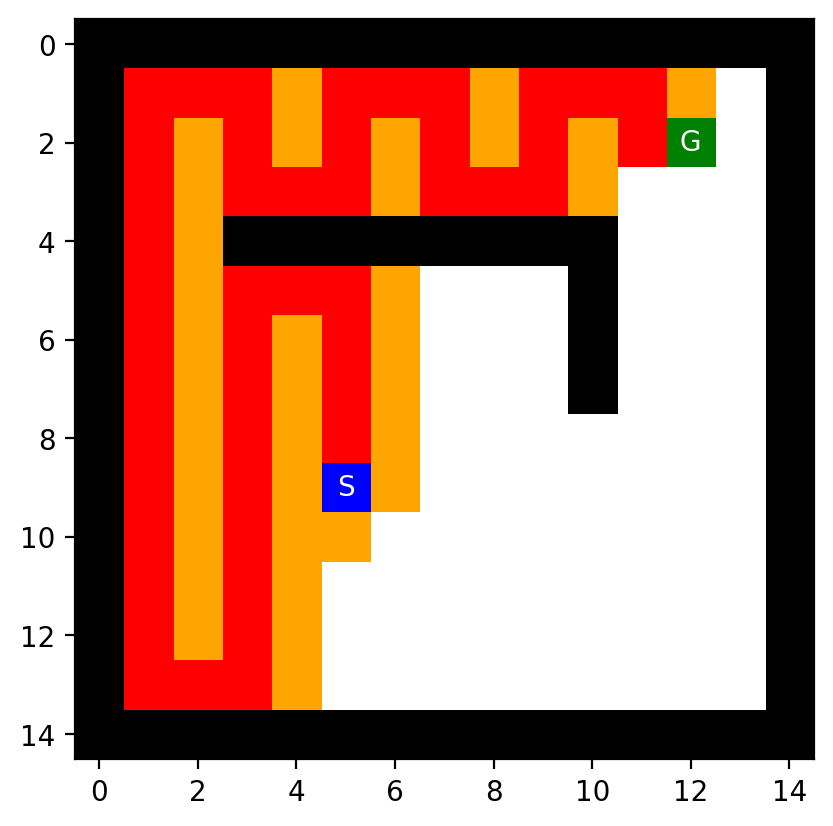

Depth-First Search
--------
Metrics:
Algorithm: DFS
Path Cost: 47
Nodes Expanded: 82
Max Tree Depth: 47
Max Nodes in Memory: 118
Max Frontier Size: 36
--------


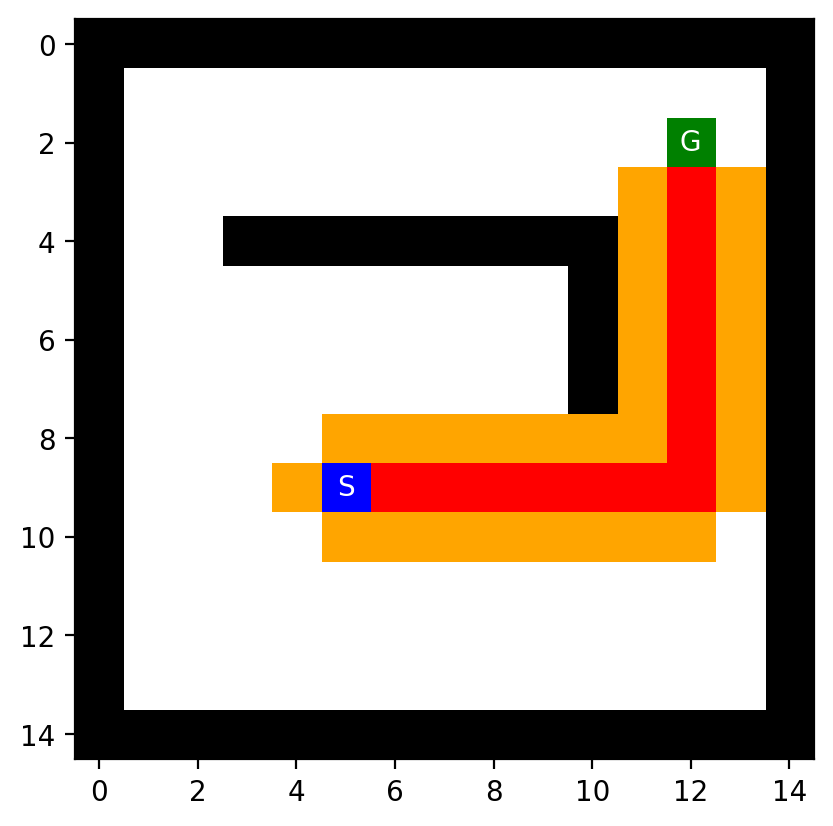

Greedy Breadth-First Search
--------
Metrics:
Algorithm: Greedy Best-First Search
Path Cost: 13
Nodes Expanded: 41
Max Tree Depth: 13
Max Nodes in Memory: 69
Max Frontier Size: 28
--------


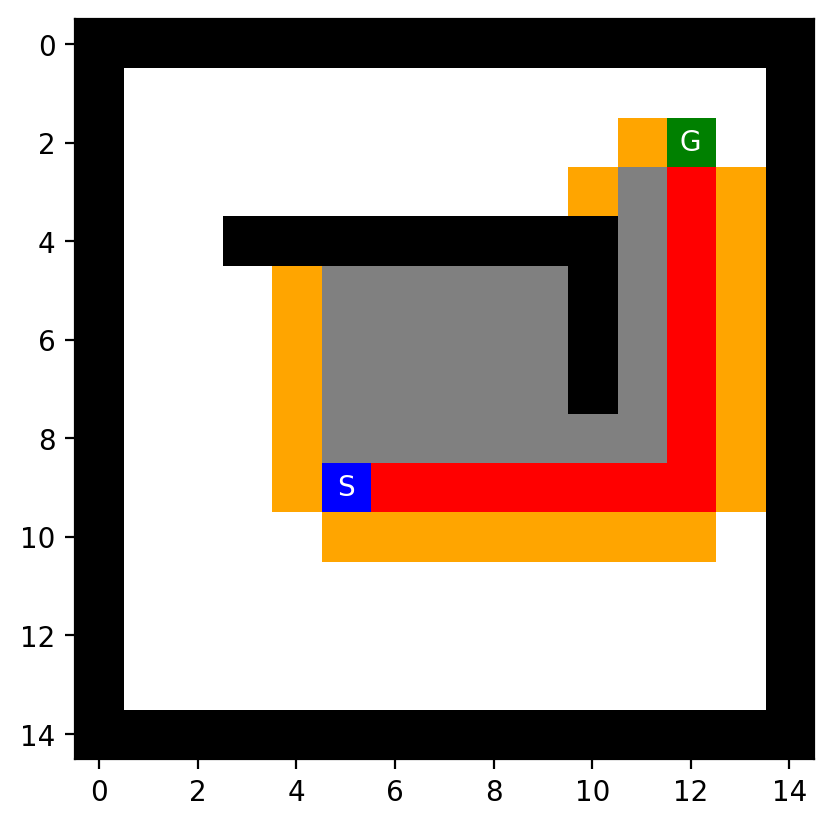

A* Search
--------
Metrics:
Algorithm: A* Search
Path Cost: 13
Nodes Expanded: 62
Max Tree Depth: 13
Max Nodes in Memory: 84
Max Frontier Size: 22
--------
wall_maze.txt


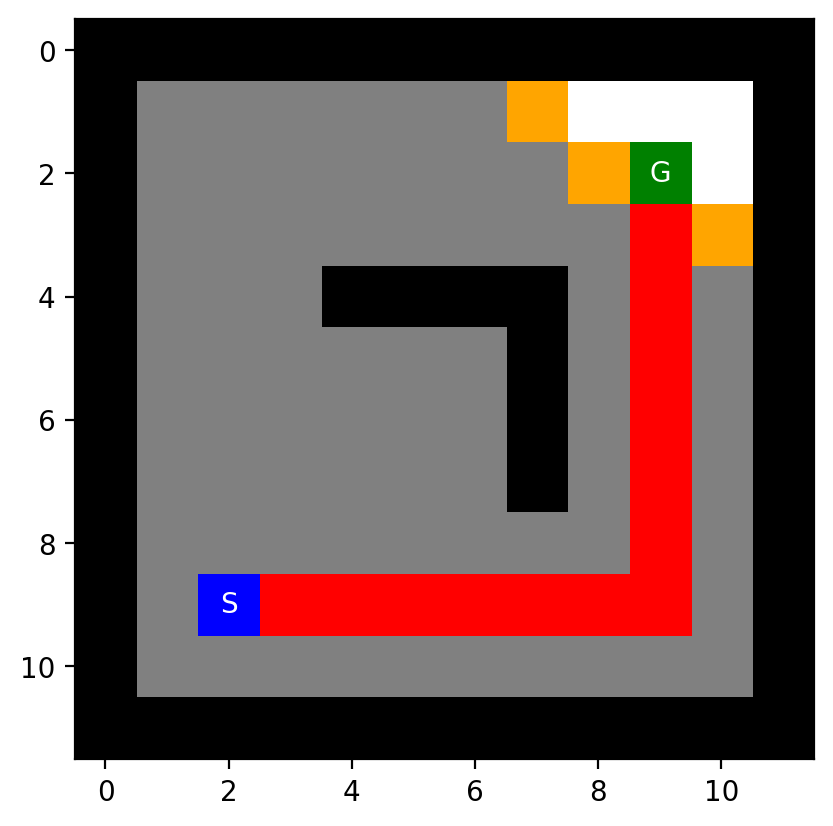

Breadth-First Search
--------
Metrics:
Algorithm: BFS
Path Cost: 13
Nodes Expanded: 87
Max Tree Depth: 14
Max Nodes in Memory: 98
Max Frontier Size: 11
--------


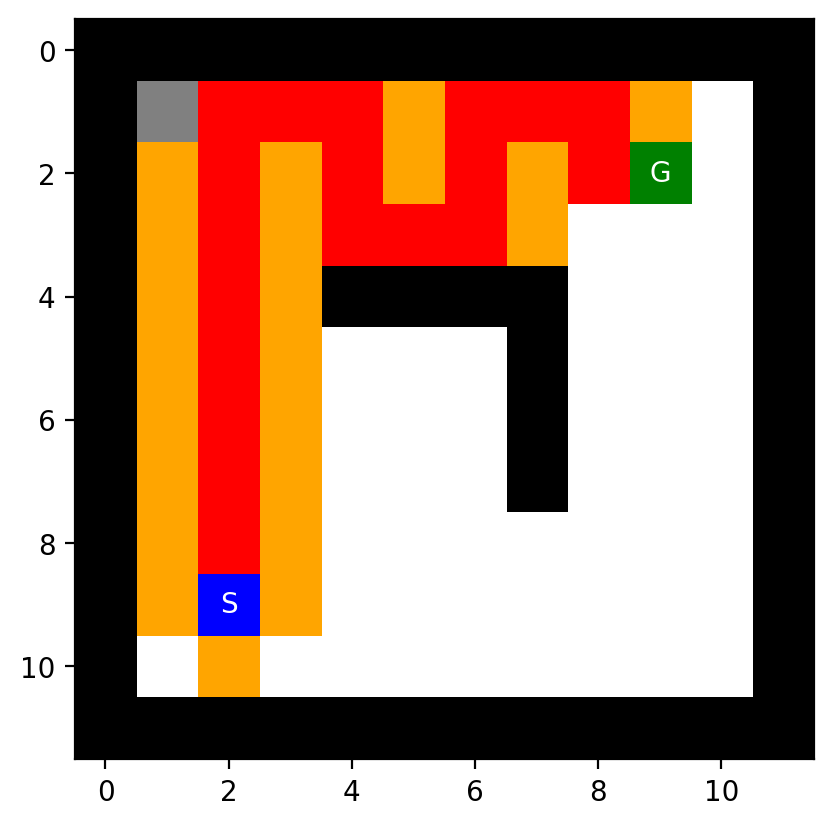

Depth-First Search
--------
Metrics:
Algorithm: DFS
Path Cost: 19
Nodes Expanded: 43
Max Tree Depth: 19
Max Nodes in Memory: 67
Max Frontier Size: 24
--------


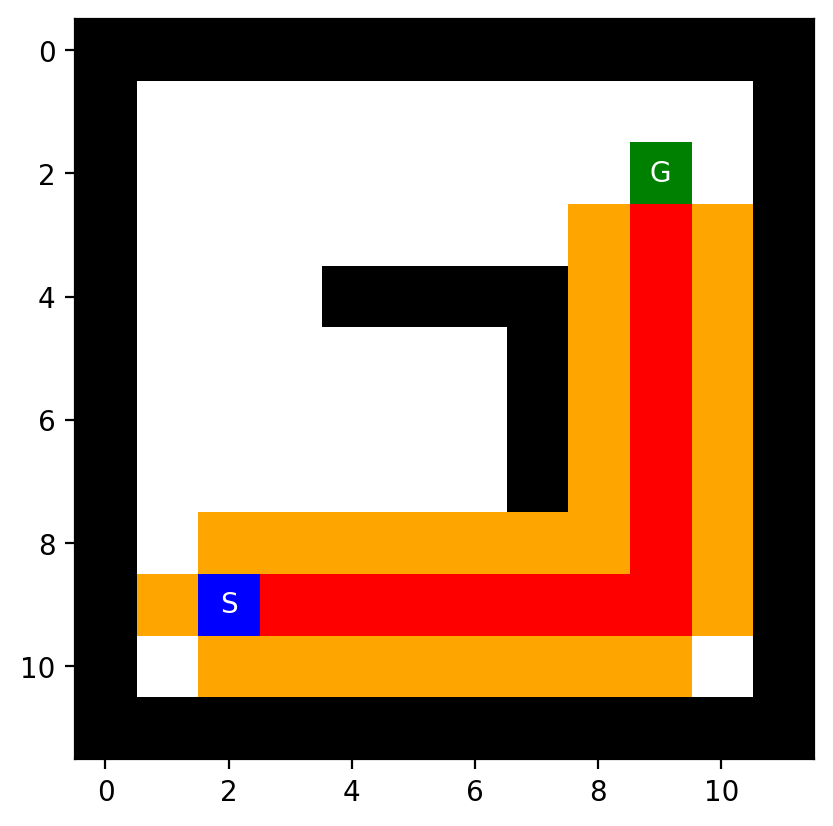

Greedy Breadth-First Search
--------
Metrics:
Algorithm: Greedy Best-First Search
Path Cost: 13
Nodes Expanded: 41
Max Tree Depth: 13
Max Nodes in Memory: 69
Max Frontier Size: 28
--------


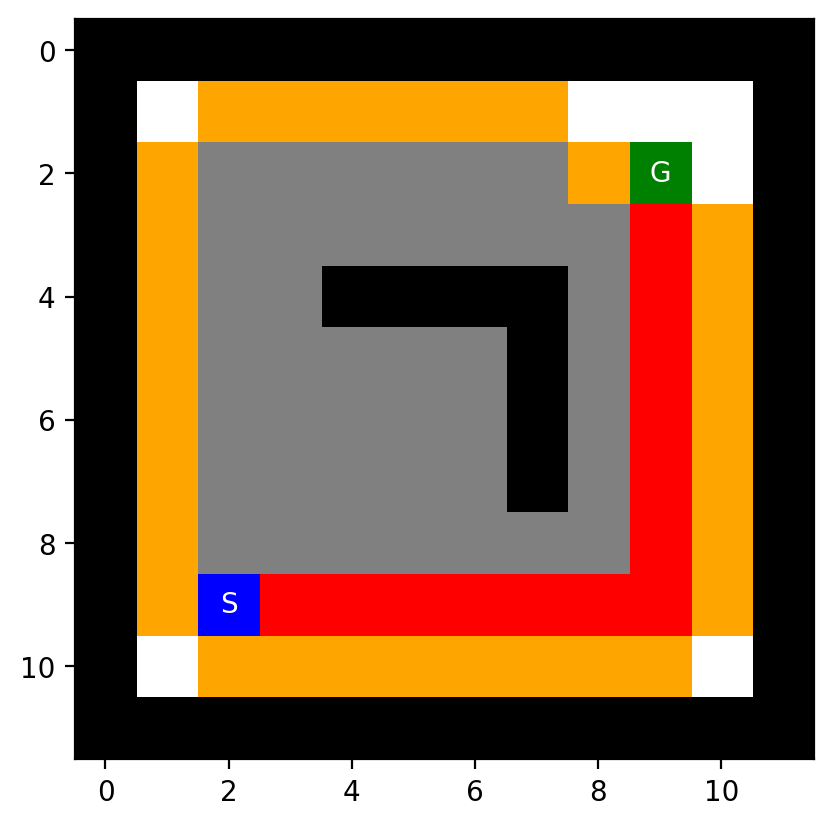

A* Search
--------
Metrics:
Algorithm: A* Search
Path Cost: 13
Nodes Expanded: 84
Max Tree Depth: 13
Max Nodes in Memory: 114
Max Frontier Size: 30
--------


In [18]:
maze_files = [
    "small_maze.txt",
    "medium_maze.txt",
    "large_maze.txt",
    "loops_maze.txt",
    "open_maze.txt",
    "empty_maze.txt",
    "empty_2_maze.txt",
    "L_maze.txt",
    "wall_maze.txt"
]

for maze in maze_files:
    
    with open(maze, "r") as f:
        maze_str = f.read()
    print(maze)
    
    bfs_maze = mh.parse_maze(maze_str)
    bfs_metrics = breadthFirstSearch(bfs_maze,False)
    mh.show_maze(bfs_maze)
    print("Breadth-First Search")
    bfs_metrics.print_metrics()
    
    dfs_maze = mh.parse_maze(maze_str)
    dfs_metrics = depthFirstSearch(dfs_maze,1000,False)
    mh.show_maze(dfs_maze)
    print("Depth-First Search")
    dfs_metrics.print_metrics()
    
    gbfs_maze = mh.parse_maze(maze_str)
    gbfs_metrics = bestFirstSearch(gbfs_maze,False)
    mh.show_maze(gbfs_maze)
    print("Greedy Breadth-First Search")
    gbfs_metrics.print_metrics()

    astar_maze = mh.parse_maze(maze_str)
    a_star_metrics = aStarSearch(astar_maze,False)
    mh.show_maze(astar_maze)
    print("A* Search")
    a_star_metrics.print_metrics()

Complete the following table for each maze.

__Small maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |     18      |  91              |   19             |   100            |  9                 |
| DFS       |    28       |      56          |       28         |     60          |       4            |
| GBS       |  28         |     42           |      27          |    47           |       5            |
| A*        |  18         |    57            |    18            |    65           |       8            |

__Medium Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |     67      |        268        |       68         |      276         |        8           |
| DFS       |    161       |       264         |    161            |        275       |        11           |
| GBS       |    151       |       163         |        150        |      171         |        8           |
| A*        |     67      |       226         |      67          |       234        |      8             |

__Large Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |     209      |     620           |       210         |        628       |        8           |
| DFS       |     209      |     497           |    210            |       528        |     31              |
| GBS       |     209      |      477          |        208        |     501          |          24         |
| A*        |       209    |       555         |      209          |       567        |      12             |

__Loops Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |     22      |       70         |      22          |       77        |        7           |
| DFS       |     36      |      59          |       36         |      71         |        12           |
| GBS       |     22      |        59       |         21       |    69           |        10           |
| A*        |     22      |      60          |      22          |     66          |         6          |

__Open Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |     53      |      681          |      53          |     704          |         23          |
| DFS       |    225       |     421           |     225           |        617       |        196           |
| GBS       |      53     |     273           |       57         |        336       |         63          |
| A*        |    53       |       553         |      53          |      576         |      23             |

__Empty Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |      13     |       94         |      14          |       106        |         12          |
| DFS       |      33     |        72        |       33         |     110          |      38             |
| GBS       |   13        |     41           |      12          |      69         |        28           |
| A*        |      13     |      91          |      13          |       121        |         30          |

__Empty 2 Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |    13       |       94         |      14          |      106         |        12           |
| DFS       |      33     |       72         |     33           |   111            |      39             |
| GBS       |      13     |       41         |     12           |         69      |          28         |
| A*        |    13       |      91          |       13         |     121          |         30          |

__L Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |    13       |      138          |      14          |       157        |     19              |
| DFS       |    47       |     82           |          47      |       118        |       36            |
| GBS       |      13     |       41         |        12        |       69        |         28          |
| A*        |    13       |       62         |       13         |        84       |          22         |

__Wall Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |     13      |       87         |     14           |      98         |       11            |
| DFS       |    19       |      43          |      19          |       67        |       24            |
| GBS       |   13        |     41           |        12        |     69          |      28             |
| A*        |   13        |     84           |        13        |    114           |       30            |

Present the results as using charts (see [Python Code Examples/charts and tables](../HOWTOs/charts_and_tables.ipynb)).

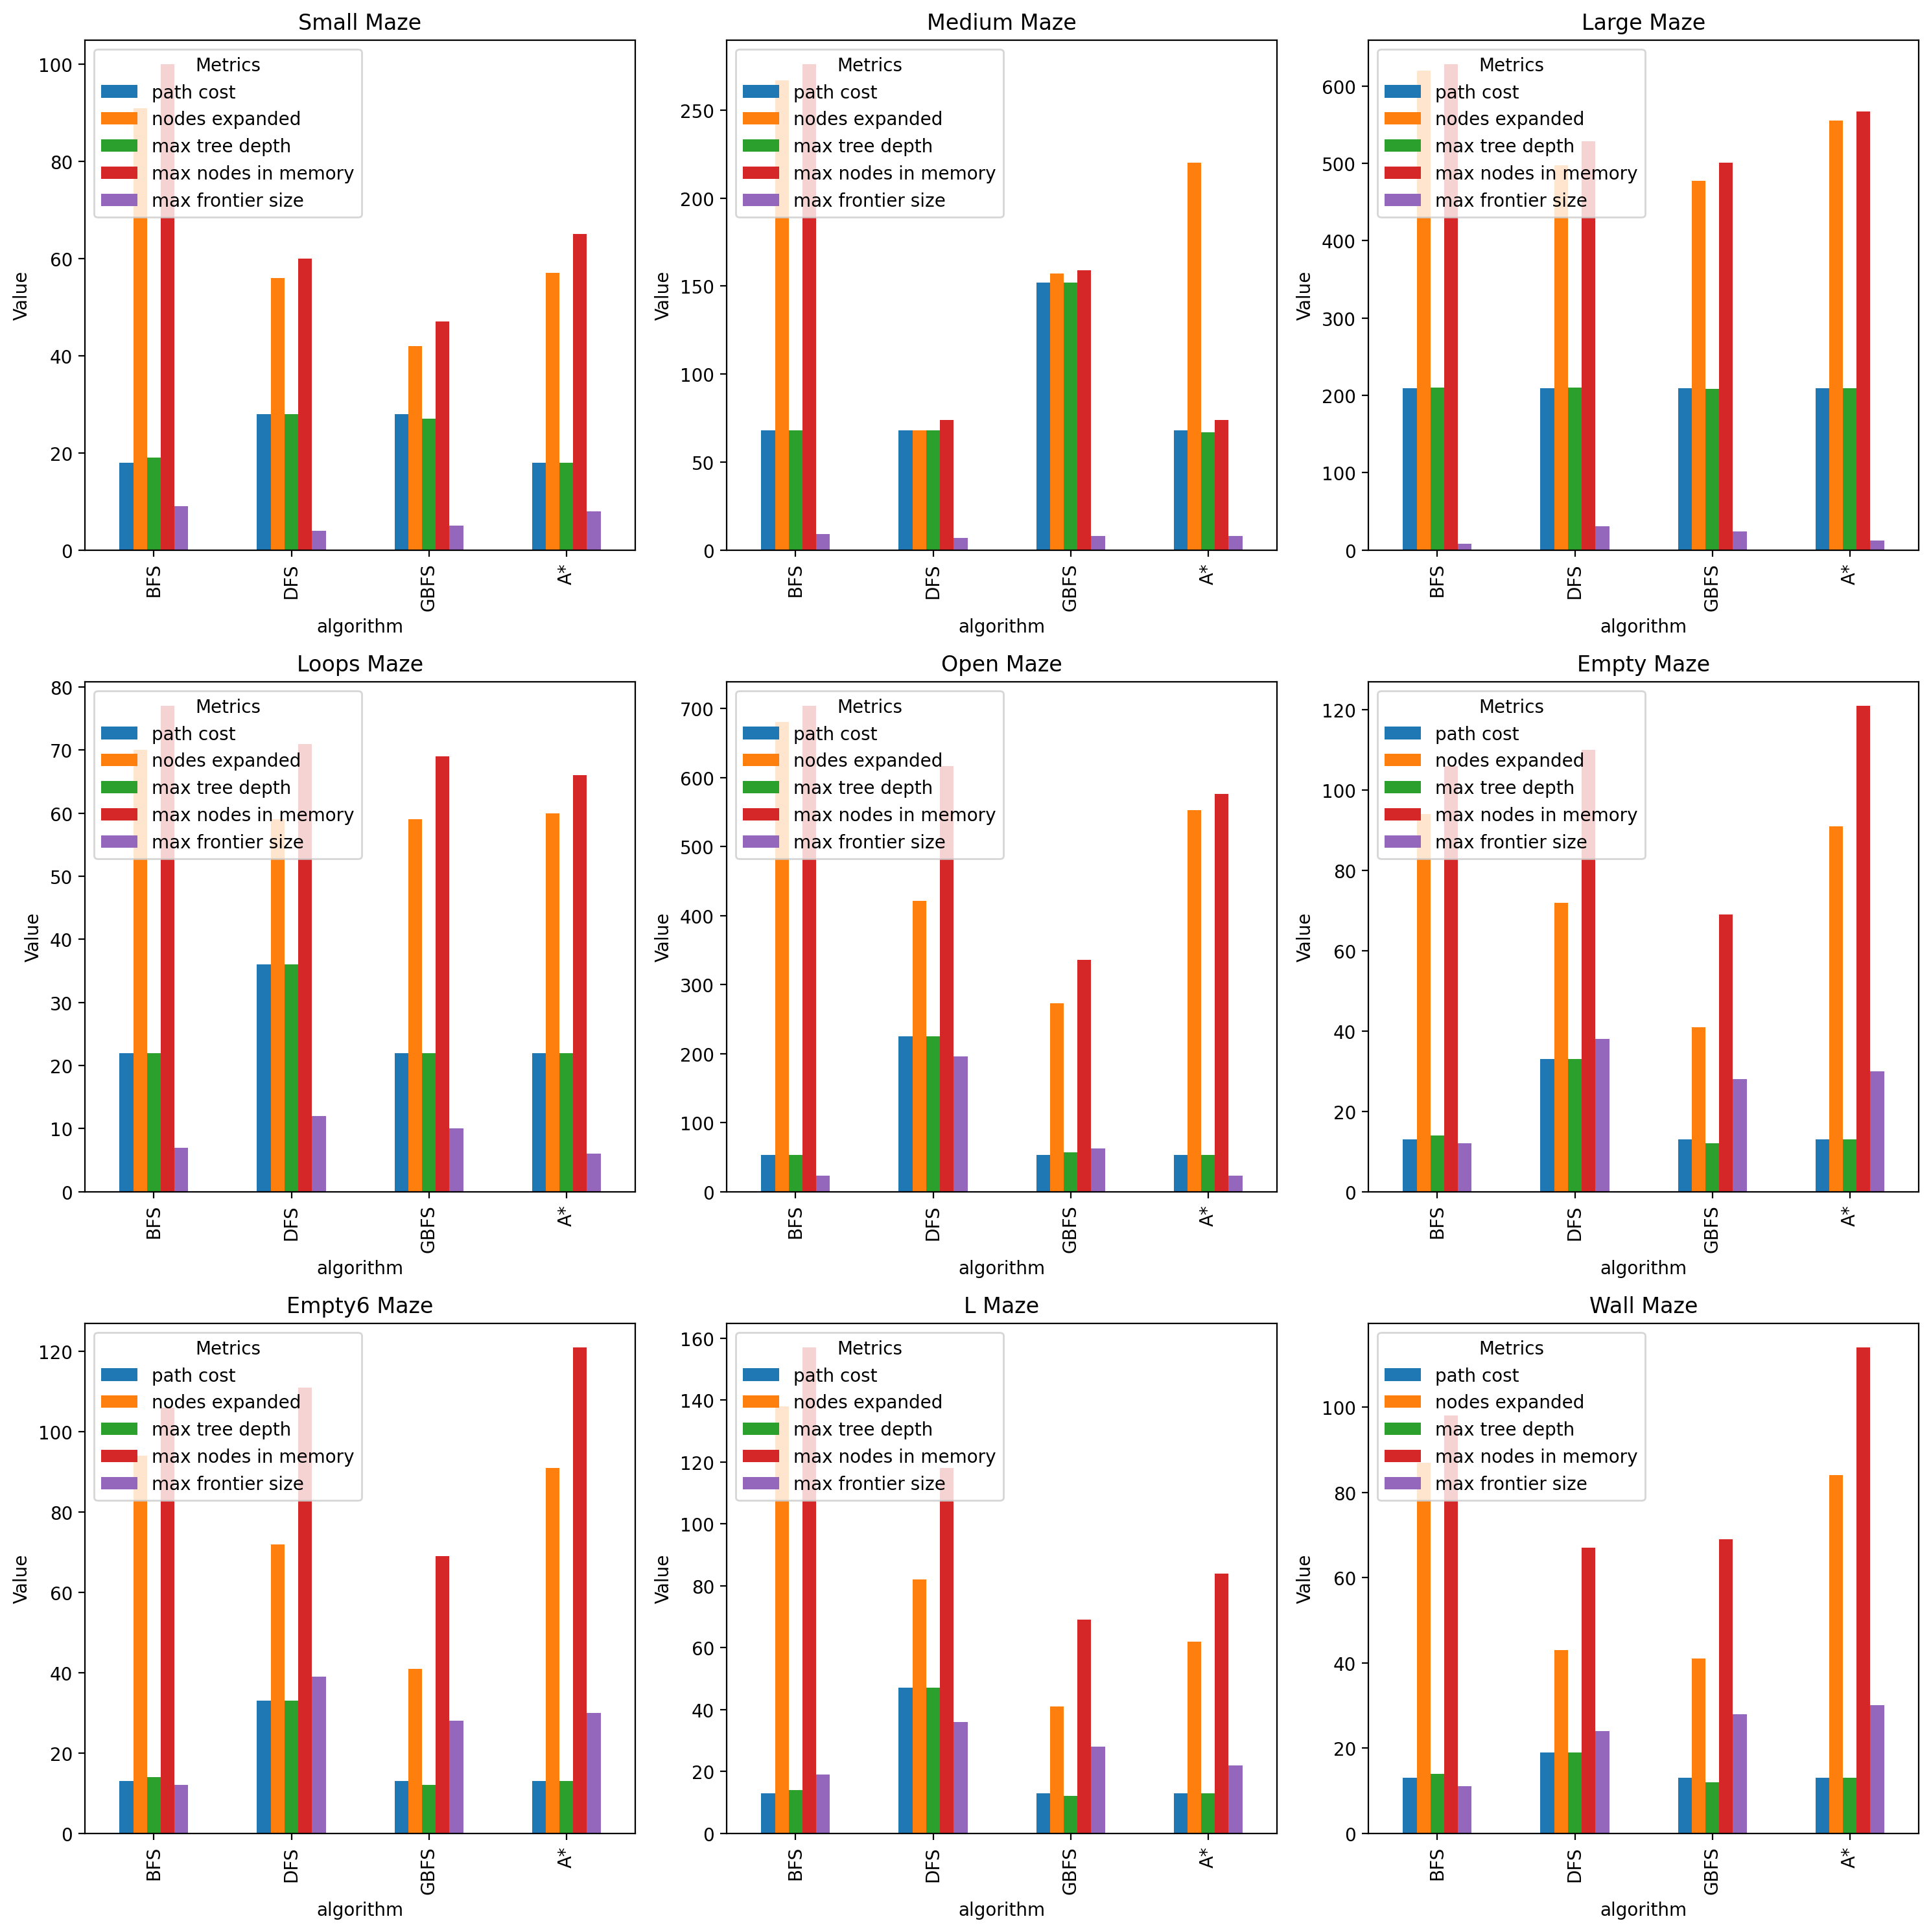

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

smallMaze = pd.DataFrame({
    'algorithm': ['BFS', 'DFS', 'GBFS', 'A*'],
    'path cost': [18, 28, 28, 18],
    'nodes expanded': [91, 56, 42, 57],
    'max tree depth': [19, 28, 27, 18],
    'max nodes in memory': [100, 60, 47, 65],
    'max frontier size': [9, 4, 5, 8]
})

mediumMaze = pd.DataFrame({
    'algorithm': ['BFS', 'DFS', 'GBFS', 'A*'],
    'path cost': [68, 68, 152, 68],
    'nodes expanded': [267, 68, 157, 220],
    'max tree depth': [68, 68, 152, 67],
    'max nodes in memory': [276, 74, 159, 74],
    'max frontier size': [9, 7, 8, 8]
})

largeMaze = pd.DataFrame({
    'algorithm': ['BFS', 'DFS', 'GBFS', 'A*'],
    'path cost': [209, 209, 209, 209],
    'nodes expanded': [620, 497, 477, 555],
    'max tree depth': [210, 210, 208, 209],
    'max nodes in memory': [628, 528, 501, 567],
    'max frontier size': [8, 31, 24, 12]
})

loopsMaze = pd.DataFrame({
    'algorithm': ['BFS', 'DFS', 'GBFS', 'A*'],
    'path cost': [22, 36, 22, 22],
    'nodes expanded': [70, 59, 59, 60],
    'max tree depth': [22, 36, 22, 22],
    'max nodes in memory': [77, 71, 69, 66],
    'max frontier size': [7, 12, 10, 6]
})


openMaze = pd.DataFrame({
    'algorithm': ['BFS', 'DFS', 'GBFS', 'A*'],
    'path cost': [53, 225, 53, 53],
    'nodes expanded': [681, 421, 273, 553],
    'max tree depth': [53, 225, 57, 53],
    'max nodes in memory': [704, 617, 336, 576],
    'max frontier size': [23, 196, 63, 23]
})

emptyMaze = pd.DataFrame({
    'algorithm': ['BFS', 'DFS', 'GBFS', 'A*'],
    'path cost': [13, 33, 13, 13],
    'nodes expanded': [94, 72, 41, 91],
    'max tree depth': [14, 33, 12, 13],
    'max nodes in memory': [106, 110, 69, 121],
    'max frontier size': [12, 38, 28, 30]
})

empty2Maze = pd.DataFrame({
    'algorithm': ['BFS', 'DFS', 'GBFS', 'A*'],
    'path cost': [13, 33, 13, 13],
    'nodes expanded': [94, 72, 41, 91],
    'max tree depth': [14, 33, 12, 13],
    'max nodes in memory': [106, 111, 69, 121],
    'max frontier size': [12, 39, 28, 30]
})

lMaze = pd.DataFrame({
    'algorithm': ['BFS', 'DFS', 'GBFS', 'A*'],
    'path cost': [13, 47, 13, 13],
    'nodes expanded': [138, 82, 41, 62],
    'max tree depth': [14, 47, 12, 13],
    'max nodes in memory': [157, 118, 69, 84],
    'max frontier size': [19, 36, 28, 22]
})

wallMaze = pd.DataFrame({
    'algorithm': ['BFS', 'DFS', 'GBFS', 'A*'],
    'path cost': [13, 19, 13, 13],
    'nodes expanded': [87, 43, 41, 84],
    'max tree depth': [14, 19, 12, 13],
    'max nodes in memory': [98, 67, 69, 114],
    'max frontier size': [11, 24, 28, 30]
})

# Define the metrics to plot
metrics = ['path cost', 'nodes expanded', 'max tree depth', 'max nodes in memory', 'max frontier size']

# Customize the plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Small Maze plot
axes[0][0].set_title('Small Maze')
smallMaze.set_index('algorithm').plot(kind='bar', ax=axes[0][0])
axes[0][0].set_ylabel('Value')
axes[0][0].legend(title='Metrics', loc='upper left')

# Medium Maze plot
axes[0][1].set_title('Medium Maze')
mediumMaze.set_index('algorithm').plot(kind='bar', ax=axes[0][1])
axes[0][1].set_ylabel('Value')
axes[0][1].legend(title='Metrics', loc='upper left')

# Large Maze plot
axes[0][2].set_title('Large Maze')
largeMaze.set_index('algorithm').plot(kind='bar', ax=axes[0][2])
axes[0][2].set_ylabel('Value')
axes[0][2].legend(title='Metrics', loc='upper left')

# Loops Maze plot
axes[1][0].set_title('Loops Maze')
loopsMaze.set_index('algorithm').plot(kind='bar', ax=axes[1][0])
axes[1][0].set_ylabel('Value')
axes[1][0].legend(title='Metrics', loc='upper left')

# Open Maze plot
axes[1][1].set_title('Open Maze')
openMaze.set_index('algorithm').plot(kind='bar', ax=axes[1][1])
axes[1][1].set_ylabel('Value')
axes[1][1].legend(title='Metrics', loc='upper left')

# Empty Maze plot
axes[1][2].set_title('Empty Maze')
emptyMaze.set_index('algorithm').plot(kind='bar', ax=axes[1][2])
axes[1][2].set_ylabel('Value')
axes[1][2].legend(title='Metrics', loc='upper left')

# Empty2 Maze plot
axes[2][0].set_title('Empty6 Maze')
empty2Maze.set_index('algorithm').plot(kind='bar', ax=axes[2][0])
axes[2][0].set_ylabel('Value')
axes[2][0].legend(title='Metrics', loc='upper left')

# L Maze plot
axes[2][1].set_title('L Maze')
lMaze.set_index('algorithm').plot(kind='bar', ax=axes[2][1])
axes[2][1].set_ylabel('Value')
axes[2][1].legend(title='Metrics', loc='upper left')

# Wall Maze plot
axes[2][2].set_title('Wall Maze')
wallMaze.set_index('algorithm').plot(kind='bar', ax=axes[2][2])
axes[2][2].set_ylabel('Value')
axes[2][2].legend(title='Metrics', loc='upper left')

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

Discuss the most important lessons you have learned from implementing the different search strategies.

Through implementing various search strategies, I have gained valuable insights. Firstly, I have learned about choosing the appropriate search strategy. Each  algorithm has its own strengths and weaknesses.  For example, Breadth-First Search guarantees completeness and optimality in finding the shortest path, making it a reliable choice for certain scenarios. On the other hand, Depth-First Search may not guarantee optimality, but it can be useful for exploring deeply into a search space, especially in cases where memory usage is a concern.

Additionally, I explored more about A* Search and Greedy Best-First Search. These algorithms utilize heuristic functions to guide the search towards the goal state more efficiently. A* Search considers both the cost to reach the current state and an estimate of the remaining cost to the goal, resulting in an optimal and informed search. Greedy Best-First Search, on the other hand, relies solely on the heuristic function to make decisions, which can lead to faster exploration but may not guarantee finding the optimal solution.





## Advanced task: IDS and Multiple goals

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Implement IDS (iterative deepening search using DFS)

2. Create a few mazes with multiple goals by adding one or two more goals to the medium size maze.
Solve the maze with your implementations for DFS, BFS, and IDS. Run experiments to show which implementations find the optimal solution and which do not. Discuss why that is the case.

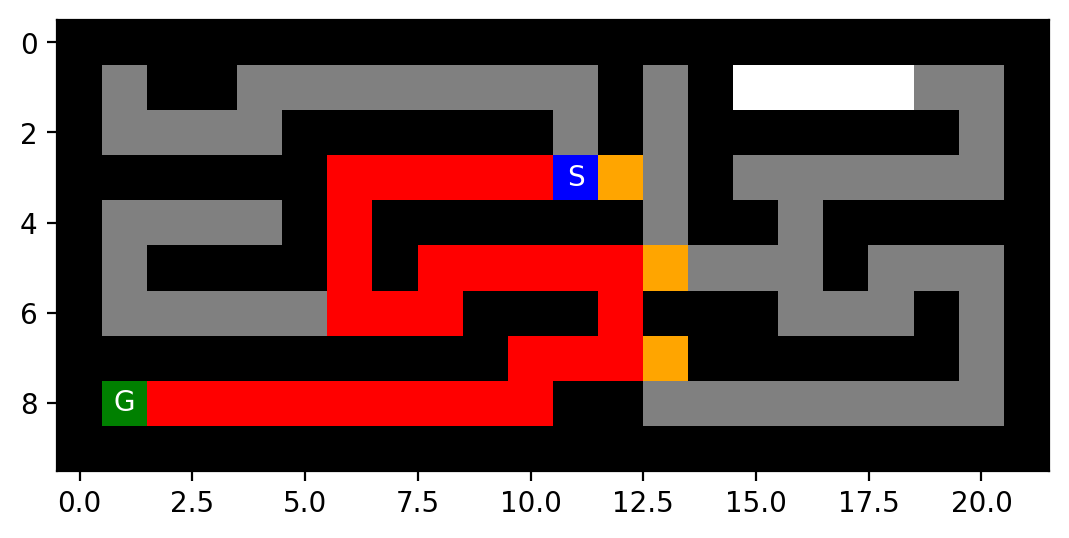

--------
Metrics:
Algorithm: DFS
Path Cost: 28
Nodes Expanded: 56
Max Tree Depth: 28
Max Nodes in Memory: 60
Max Frontier Size: 4
--------


In [20]:
def IDS(maze,cutoffAmount = 40, verbose = False):
    for depth in range(cutoffAmount):
        result = depthFirstSearch(maze,depth, verbose)
        if result.solution_path:
            return result

with open("small_maze.txt", "r") as f:
    maze_str = f.read()
maze = mh.parse_maze(maze_str)
IDS_metrics = IDS(maze,90,False)
mh.show_maze(maze)
IDS_metrics.print_metrics()

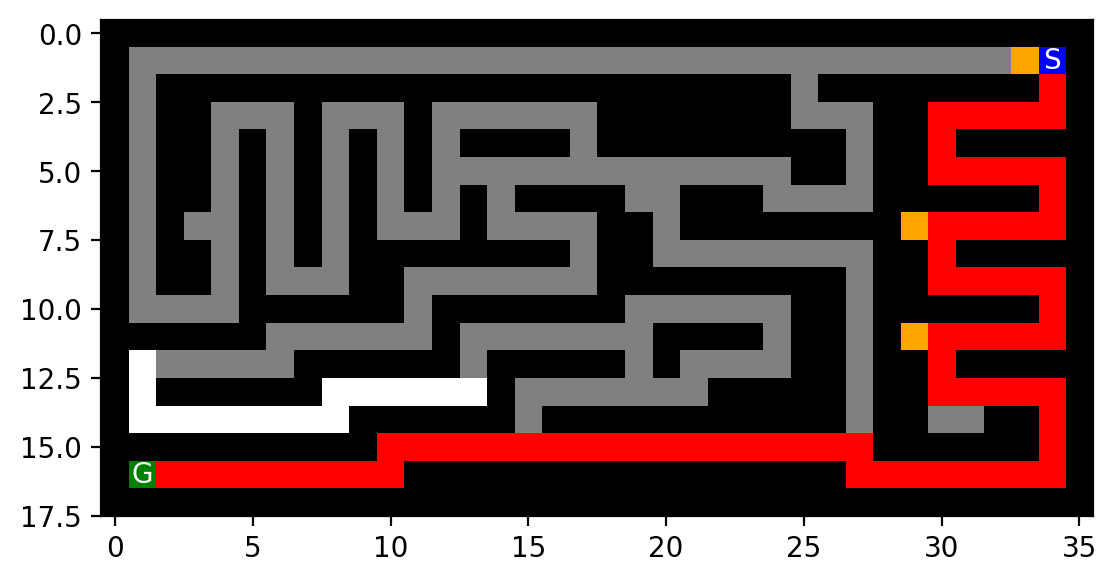

--------
Metrics:
Algorithm: DFS
Path Cost: 73
Nodes Expanded: 157
Max Tree Depth: 74
Max Nodes in Memory: 165
Max Frontier Size: 8
--------


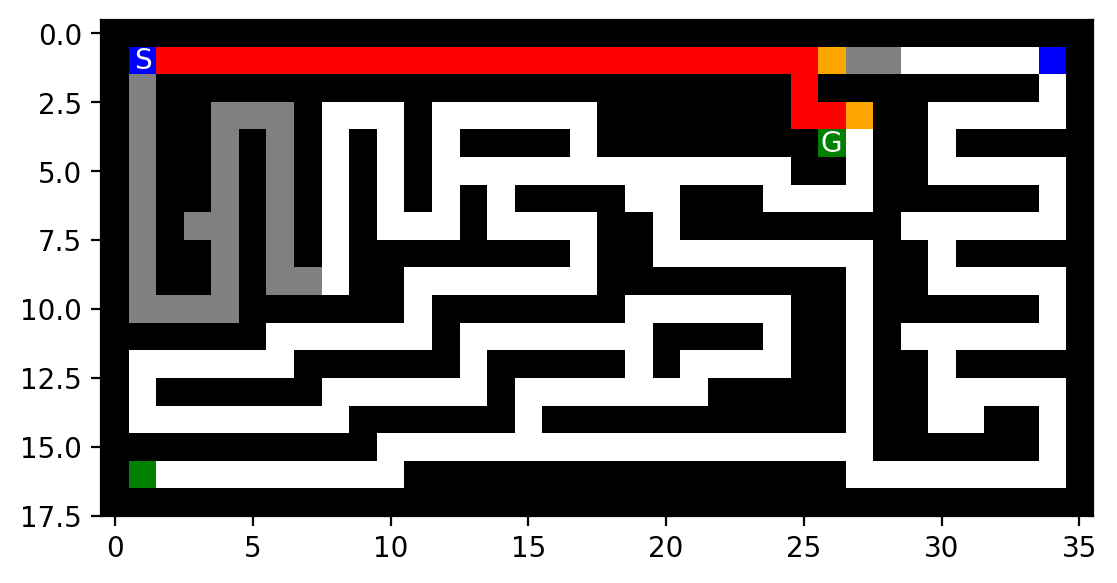

--------
Metrics:
Algorithm: DFS
Path Cost: 27
Nodes Expanded: 59
Max Tree Depth: 28
Max Nodes in Memory: 62
Max Frontier Size: 3
--------


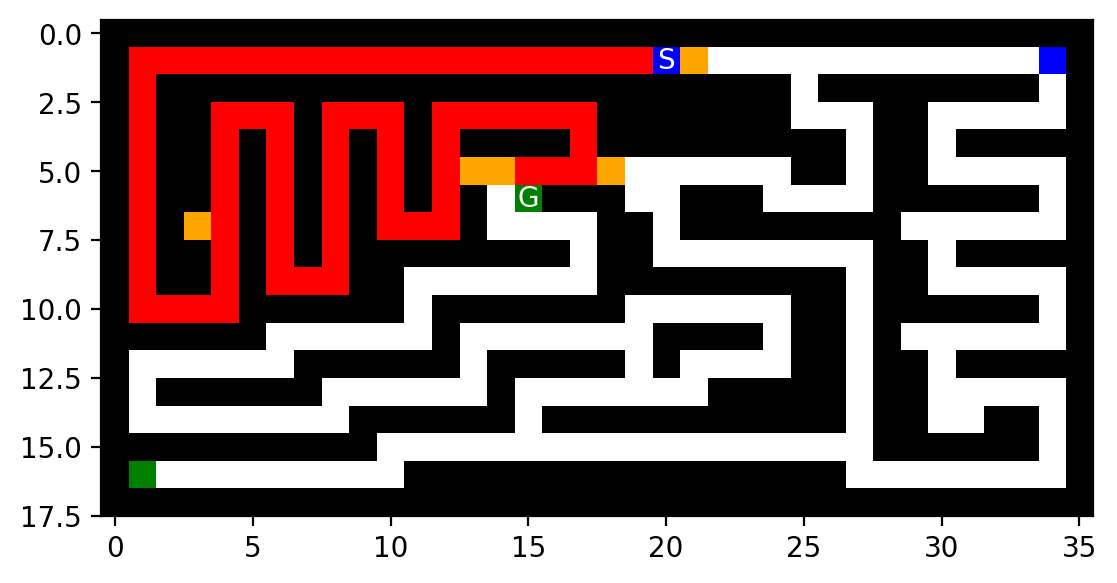

--------
Metrics:
Algorithm: DFS
Path Cost: 75
Nodes Expanded: 81
Max Tree Depth: 75
Max Nodes in Memory: 87
Max Frontier Size: 6
--------


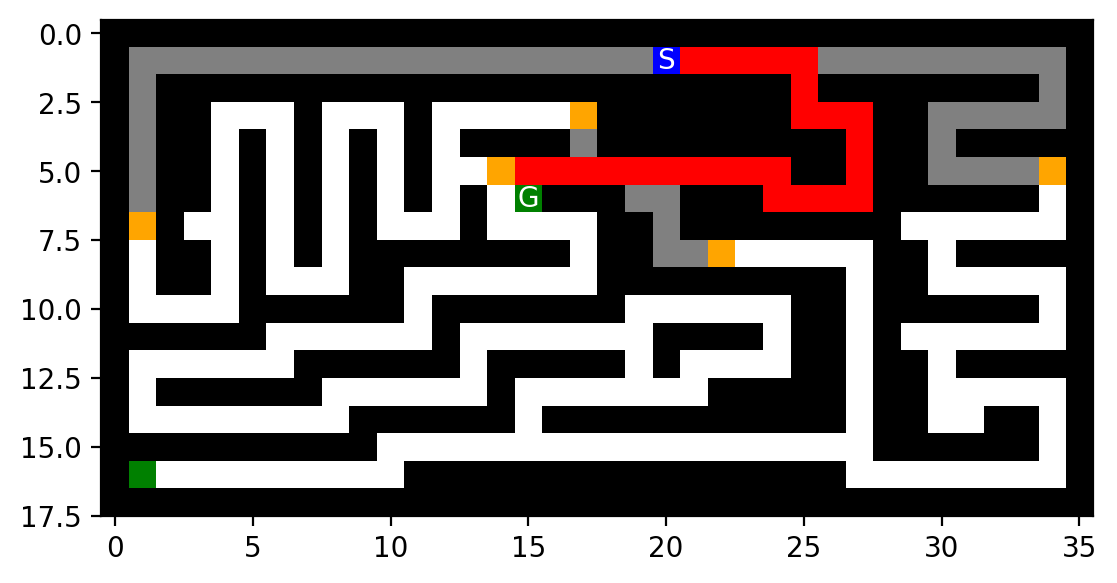

--------
Metrics:
Algorithm: BFS
Path Cost: 25
Nodes Expanded: 80
Max Tree Depth: 26
Max Nodes in Memory: 85
Max Frontier Size: 5
--------


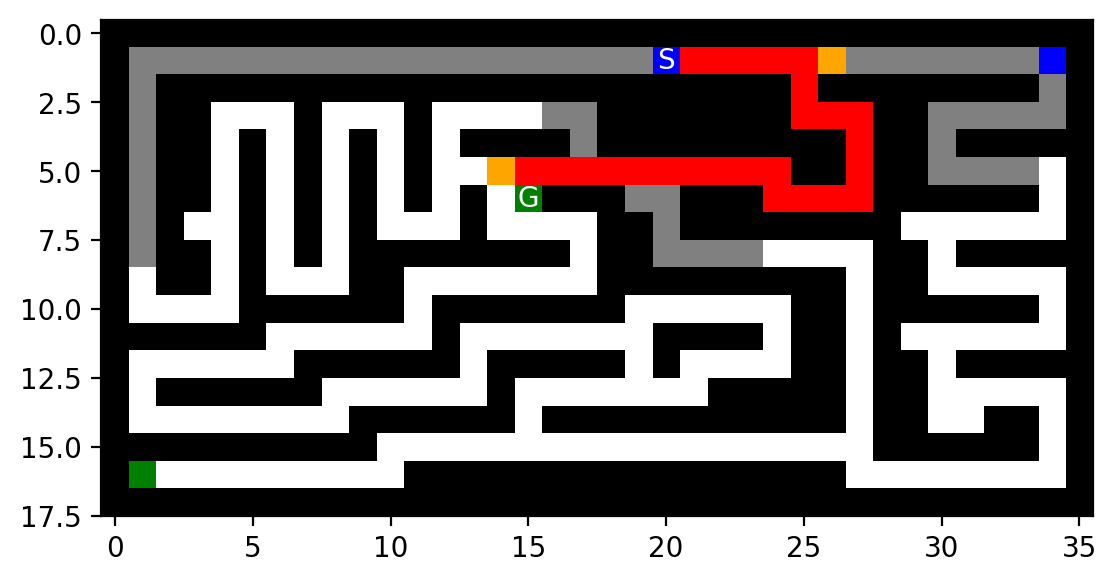

--------
Metrics:
Algorithm: DFS
Path Cost: 25
Nodes Expanded: 64
Max Tree Depth: 26
Max Nodes in Memory: 68
Max Frontier Size: 4
--------


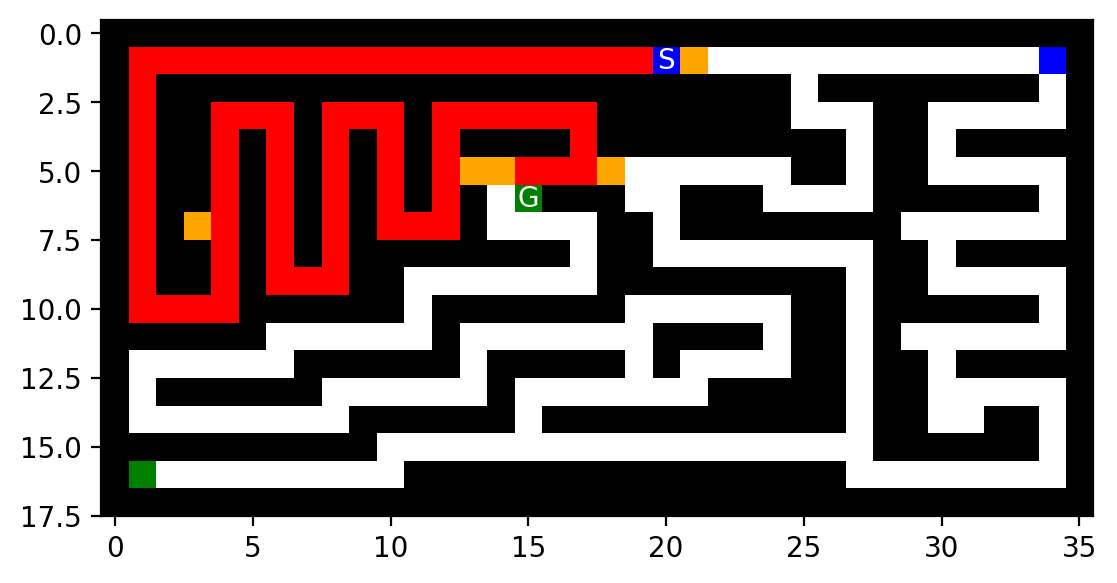

--------
Metrics:
Algorithm: DFS
Path Cost: 75
Nodes Expanded: 81
Max Tree Depth: 75
Max Nodes in Memory: 87
Max Frontier Size: 6
--------


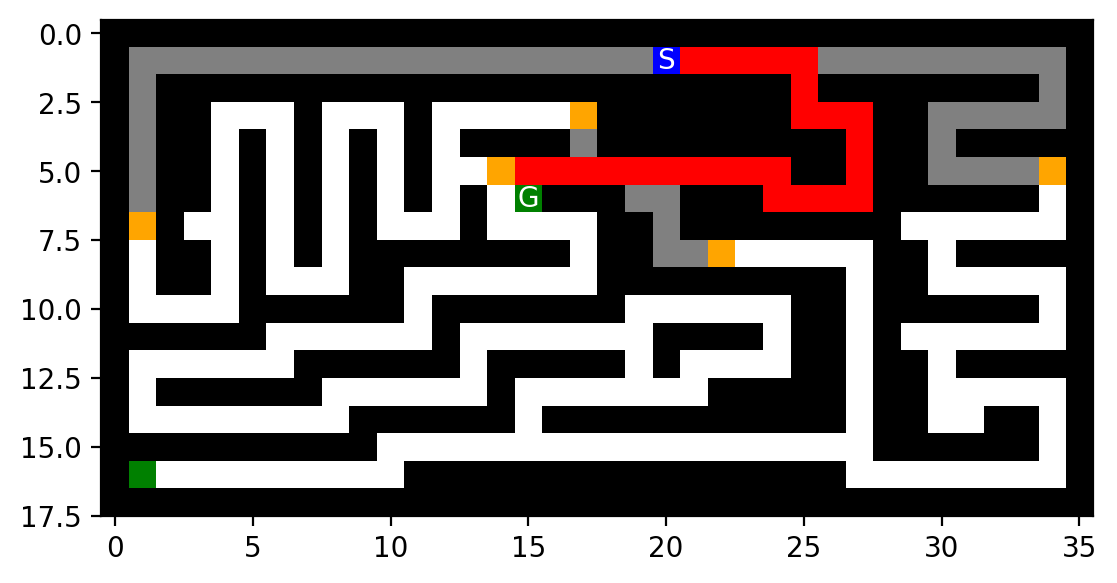

--------
Metrics:
Algorithm: BFS
Path Cost: 25
Nodes Expanded: 80
Max Tree Depth: 26
Max Nodes in Memory: 85
Max Frontier Size: 5
--------


In [21]:
with open("medium_maze.txt", "r") as f:
    maze_str = f.read()
maze = mh.parse_maze(maze_str)
IDS_metrics = IDS(maze,90,False)
mh.show_maze(maze)
IDS_metrics.print_metrics()

maze = mh.parse_maze(maze_str)
maze[(1,1)] = "S"
maze[(4,26)] = "G"
IDS_metrics = IDS(maze,90,False)
mh.show_maze(maze)
IDS_metrics.print_metrics()

maze = mh.parse_maze(maze_str)
maze[(1, 20)] = "S"
maze[(6,15)] = "G"
dfs_metrics = depthFirstSearch(maze,90,False)
mh.show_maze(maze)
dfs_metrics.print_metrics()

maze = mh.parse_maze(maze_str)
maze[(1, 20)] = "S"
maze[(6,15)] = "G"
bfs_metrics = breadthFirstSearch(maze,False)
mh.show_maze(maze)
bfs_metrics.print_metrics()


maze = mh.parse_maze(maze_str)
maze[(1, 20)] = "S"
maze[(6,15)] = "G"
IDS_metrics = IDS(maze,90,False)
mh.show_maze(maze)
IDS_metrics.print_metrics()

maze = mh.parse_maze(maze_str)
maze[(1, 20)] = "S"
maze[(6,15)] = "G"
dfs_metrics = depthFirstSearch(maze,90,False)
mh.show_maze(maze)
dfs_metrics.print_metrics()

maze = mh.parse_maze(maze_str)
maze[(1, 20)] = "S"
maze[(6,15)] = "G"
bfs_metrics = breadthFirstSearch(maze,False)
mh.show_maze(maze)
bfs_metrics.print_metrics()

Breadth-First Search (BFS) and Iterative Deepening Search (IDS) are guaranteed to find the optimal solution because they systematically explore all possible states at each depth level, starting from depth 0 and incrementing it. On the other hand, Depth-First Search (DFS) does not guarantee finding the optimal solution as it continues exploring from the first node it chooses until it reaches a goal state or reaches a dead end and can no longer proceed.

## More advanced tasks to think about

Instead of defining each square as a state, use only intersections as states. Now the storage requirement is reduced, but the path length between two intersections can be different. If we use total path length measured as the number of squares as path cost, how can we make sure that BFS and iterative deepening search is optimal? Change the code to do so.

In [22]:
# Your code/answer goes here

Modify your A* search to add weights (see text book) and explore how different weights influence the result.

In [23]:
# Your code/answer goes here

What happens if the agent does not know the layout of the maze in advance (i.e., faces an unkown, only partially observable environment)? How does the environment look then (PEAS description)? How would you implement a rational agent to solve the maze? What if the agent still has a GPS device to tell the distance to the goal?

In [24]:
# Your code/answer goes here